### Step 0: Problem Statement 

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth! 

### Aim :
- To classify the potential churn customers based on numerical and categorical features.
- It is a **binary classification** problem for an imbalanced dataset.

### Dataset Dictionary
    
- **customerID** : Customer ID
- **gender** : Whether the customer is a male or a female
- **SeniorCitizen** : Whether the customer is a senior citizen or not (1, 0)
- **Partner** : Whether the customer has a partner or not (Yes, No)
- **Dependents** : Whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Whether the customer churned or not (Yes or No)

### Step 1: Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85     0  
1               Mailed check          56.95        1889.5     0  
2               Mailed check          53.85        108.15     1  
3  Bank transfer (automatic)          42.30       1840.75     0  
4           Electronic check          70.70        151.65     1  

[5 rows x 21 columns]

Data info:

In [3]:
data.shape

(5785, 21)

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5785 entries, 0 to 5784
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5785 non-null   object 
 1   gender            5785 non-null   object 
 2   SeniorCitizen     5785 non-null   int64  
 3   Partner           5785 non-null   object 
 4   Dependents        5785 non-null   object 
 5   tenure            5785 non-null   int64  
 6   PhoneService      5785 non-null   object 
 7   MultipleLines     5785 non-null   object 
 8   InternetService   5785 non-null   object 
 9   OnlineSecurity    5785 non-null   object 
 10  OnlineBackup      5785 non-null   object 
 11  DeviceProtection  5785 non-null   object 
 12  TechSupport       5785 non-null   object 
 13  StreamingTV       5785 non-null   object 
 14  StreamingMovies   5785 non-null   object 
 15  Contract          5785 non-null   object 
 16  PaperlessBilling  5785 non-null   object 


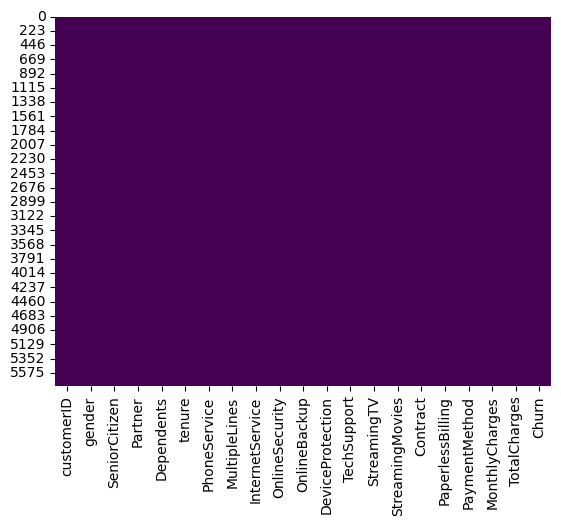

In [6]:
sns.heatmap(data.isnull(),cmap = 'viridis',cbar = False);

- No null values present in the data.

In [7]:
data.describe().T

count  mean   std   min   25%   50%   75%    max
SeniorCitizen  5785.00  0.16  0.37  0.00  0.00  0.00  0.00   1.00
tenure         5785.00 32.26 24.58  0.00  9.00 29.00 55.00  72.00
MonthlyCharges 5785.00 64.78 30.12 18.25 35.45 70.40 89.85 118.75
Churn          5785.00  0.26  0.44  0.00  0.00  0.00  1.00   1.00

- The dataset has too many features with text data and are probably categorical features!
- Total Charges is a feature with numerical values but are stored in string datatype. First, we will convert this column into - float.

In [8]:
# Converting DataFrame column elements from string to float using the following code line :
# data['TotalCharges'] = data['TotalCharges'].astype(float)
l1 = [len(str(i).split()) for i in data['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces:', *l2)

for i in l2:
    data.loc[i, 'TotalCharges'] = data.loc[(i - 1), 'TotalCharges']

data['TotalCharges'] = data['TotalCharges'].astype(float)
data.drop(columns=['customerID'], inplace=True)

Index Positions with empty spaces: 488 753 936 1082 1340 3331 3826 4380 5218


- We dropped the customerID column.
- Let's divide the features into numerical and categorical features.
- We will also execute the label encoding transformation for categorical features.

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [10]:
df1.describe().T

count    mean     std   min    25%     50%     75%     max
gender           5785.00    0.50    0.50  0.00   0.00    1.00    1.00    1.00
SeniorCitizen    5785.00    0.16    0.37  0.00   0.00    0.00    0.00    1.00
Partner          5785.00    0.48    0.50  0.00   0.00    0.00    1.00    1.00
Dependents       5785.00    0.30    0.46  0.00   0.00    0.00    1.00    1.00
tenure           5785.00   32.26   24.58  0.00   9.00   29.00   55.00   72.00
PhoneService     5785.00    0.91    0.29  0.00   1.00    1.00    1.00    1.00
MultipleLines    5785.00    0.94    0.95  0.00   0.00    1.00    2.00    2.00
InternetService  5785.00    0.88    0.74  0.00   0.00    1.00    1.00    2.00
OnlineSecurity   5785.00    0.79    0.86  0.00   0.00    1.00    2.00    2.00
OnlineBackup     5785.00    0.91    0.88  0.00   0.00    1.00    2.00    2.00
DeviceProtection 5785.00    0.91    0.88  0.00   0.00    1.00    2.00    2.00
TechSupport      5785.00    0.80    0.86  0.00   0.00    1.00    2.00    2.00
StreamingTV      5785.00    0.99    0.88  0.00   0.00    1.00    2.00    2.00
StreamingMovies  5785.00    0.99    0.88  0.00   0.00    1.00    2.00    2.00
Contract         5785.00    0.69    0.83  0.00   0.00    0.00    1.00    2.00
PaperlessBilling 5785.00    0.59    0.49  0.00   0.00    1.00    1.00    1.00
PaymentMethod    5785.00    1.57    1.07  0.00   1.00    2.00    2.00    3.00
MonthlyCharges   5785.00   64.78   30.12 18.25  35.45   70.40   89.85  118.75
TotalCharges     5779.00 2276.77 2265.20 18.80 393.30 1398.60 3765.62 8684.80
Churn            5785.00    0.26    0.44  0.00   0.00    0.00    1.00    1.00

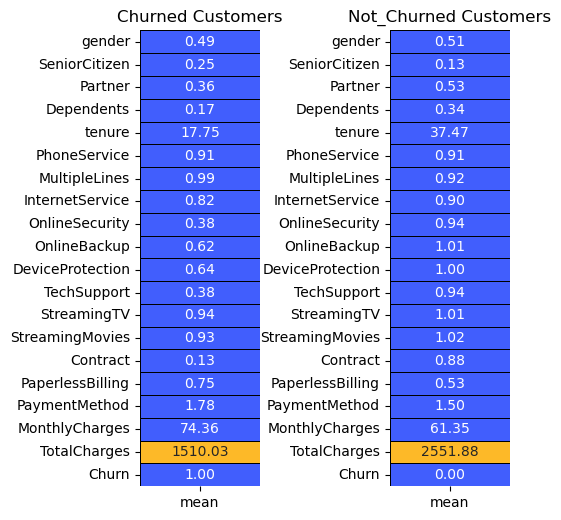

In [11]:
colors = ['#415efd','#fdb928']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

- Mean values of all the features for churned and not-churned customers.
- Clearly, the customers that churned had a low mean tenure of 17.98 months as compared to those who continued with an average tenure period of 37.57 months.
- Mean values of OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport are higher for not-churned customers than churn customers. This can serve as a good indicator or point to focus on!
- Churned customer's Contract value is much smaller than those of not-churned customers.
- Mean MonthlyCharges of the churn customers, 74.44, is more than that of not-churn customers, 61.27.
- Not-churned customers TotalCharges, 2557.31, is higher than churn customers, 1531.80.
- From these mean values, we can say that some of the features display a clear cut difference that can help to focus more churn customers to make sure they retain the services.
- The dataset has too many categorical features, hence mean values of the features are present in the vicinity of 0.

# Step 2: Exploratory Data Analysis

#### Dividing features into Numerical and Categorical :

In [12]:
col = list(df1.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


- Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
- Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.

Eg : datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

- For this dataset, as the number of features are less, we can manually check the dataset as well.

#### Target Variable Visualization (Churn) :

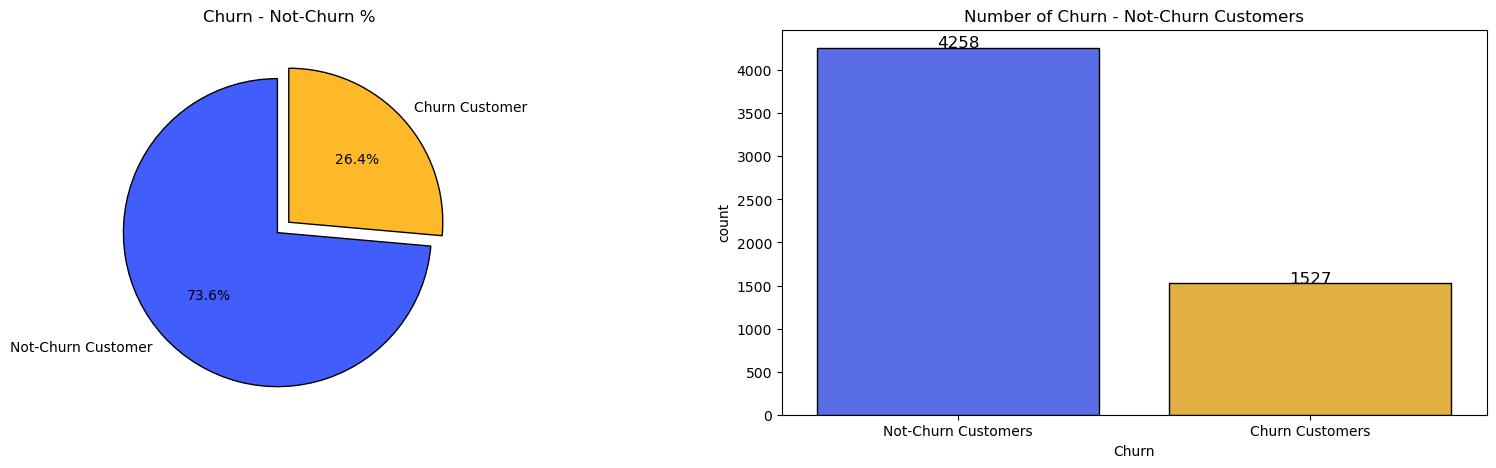

In [13]:
l = list(df1['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.subplot(1,2,2)
ax = sns.countplot('Churn',data = data,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 12)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Number of Churn - Not-Churn Customers');
plt.show()

- The dataset is imbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers!
- Due to this, predictions will be biased towards Not-Churn customers.
- Visualizations will also display this bias!

#### Categorical Features vs Target Variable (Churn):

In [14]:
categorical_features.remove('Churn')

We will remove Churn, target variable, from the categorical features list for visualization purposes.

In [15]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

- We have too many categorical features in this dataset!
- We divide them into 3 groups depending on their values or based on the column name!

#### Group 1 : Customer Information :
Gender | SeniorCitizen | Partner | Dependents |

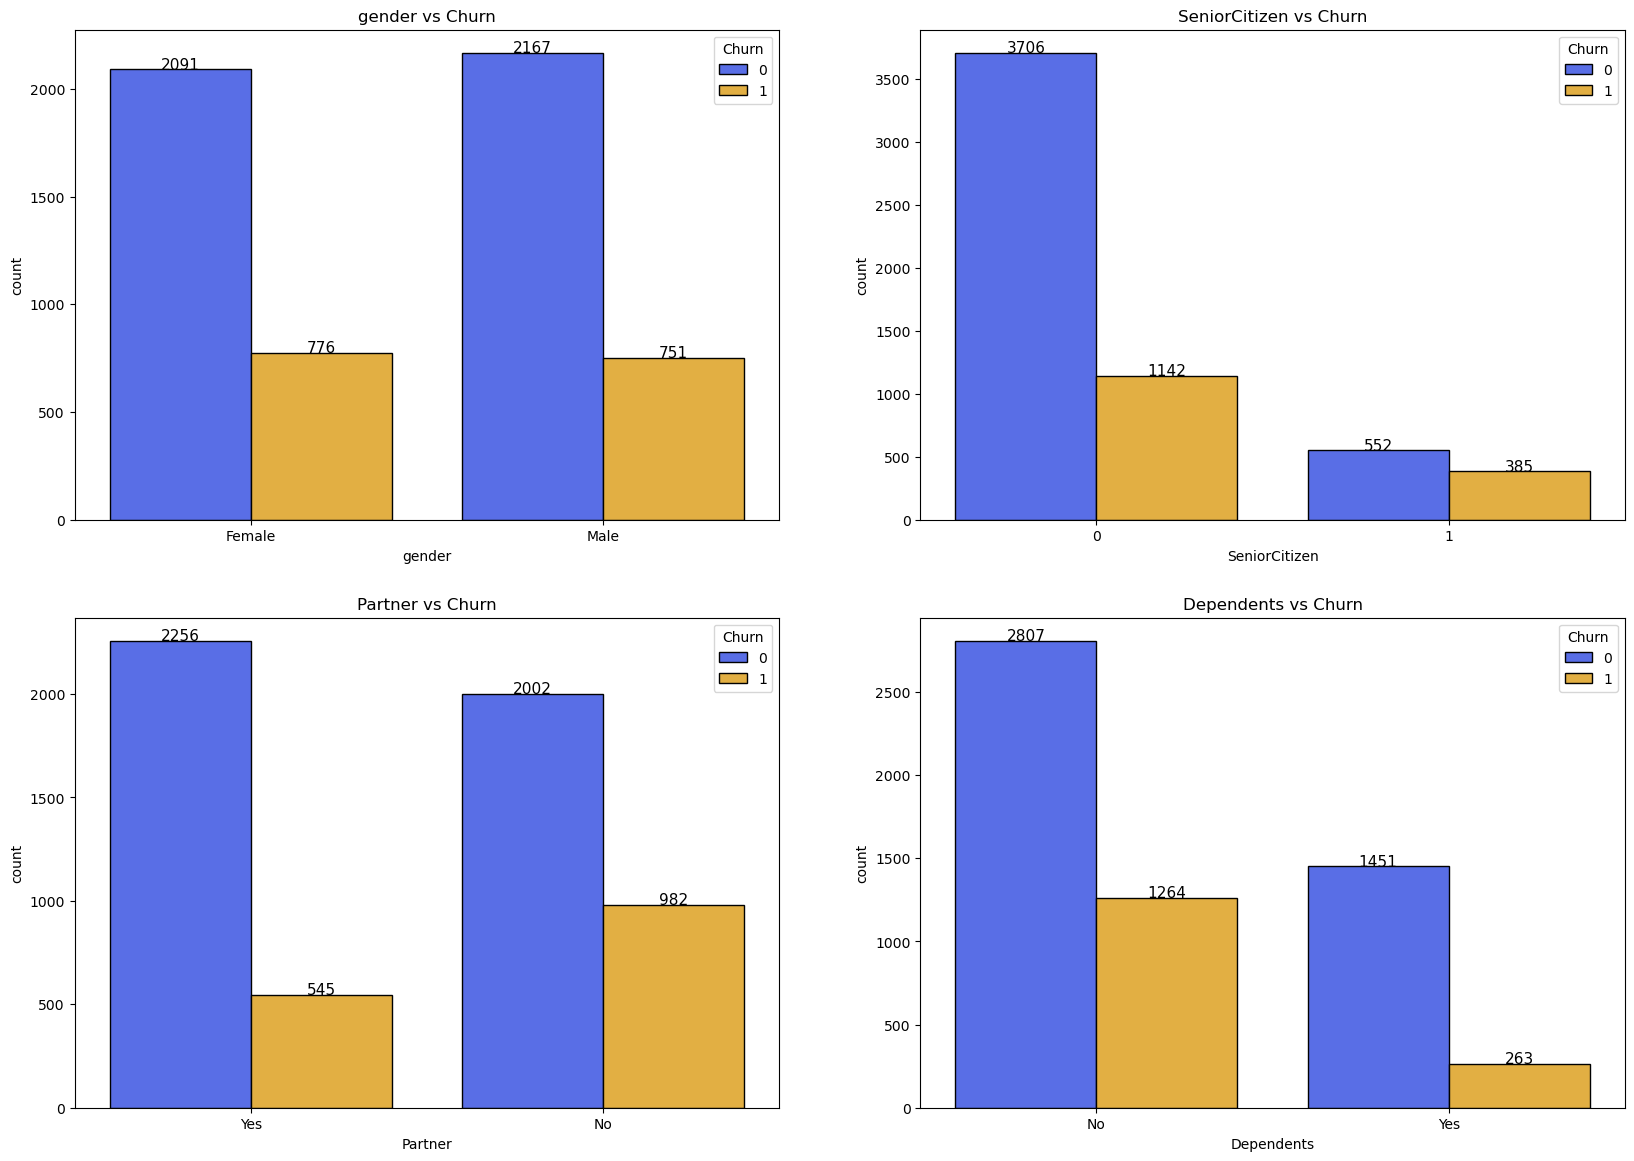

In [16]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(l1[i],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

- Customer churning for male & female customers is very similar to each other!
- Similarly, number of SeniorCitizen customers is pretty low! Out of that, we can observe a near about 40% churn of SeniorCitizen customers. It accounts for a total of 476 customers out of 1142 Senior Citizen customers.
- Customers who are housing with a Partner churned less as compared to those not living with a Partner.
- Similary, churning is high for the customers that don't have Dependents with them!

#### Group 2: Services Subscribed by the Customer :

- For visualization purposes, we will create 2 groups!

PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

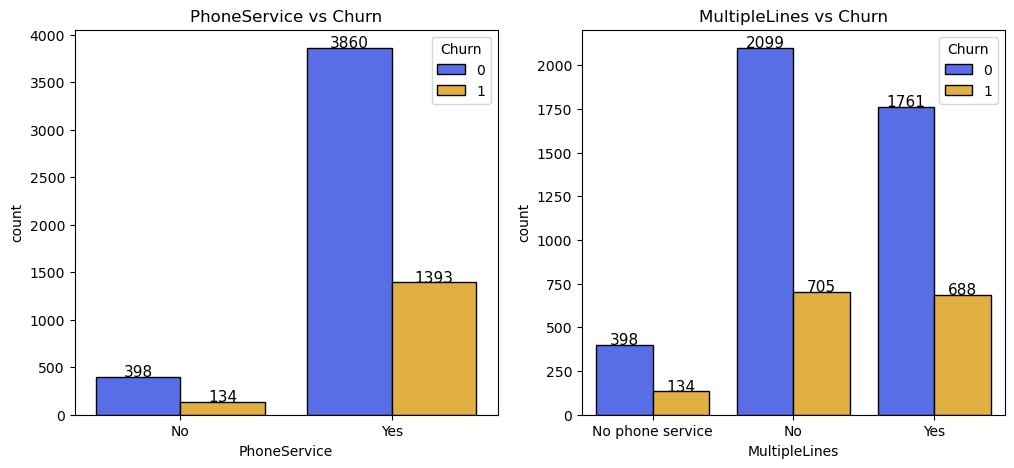

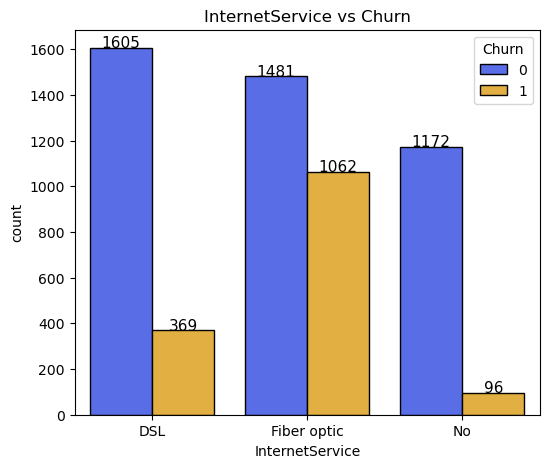

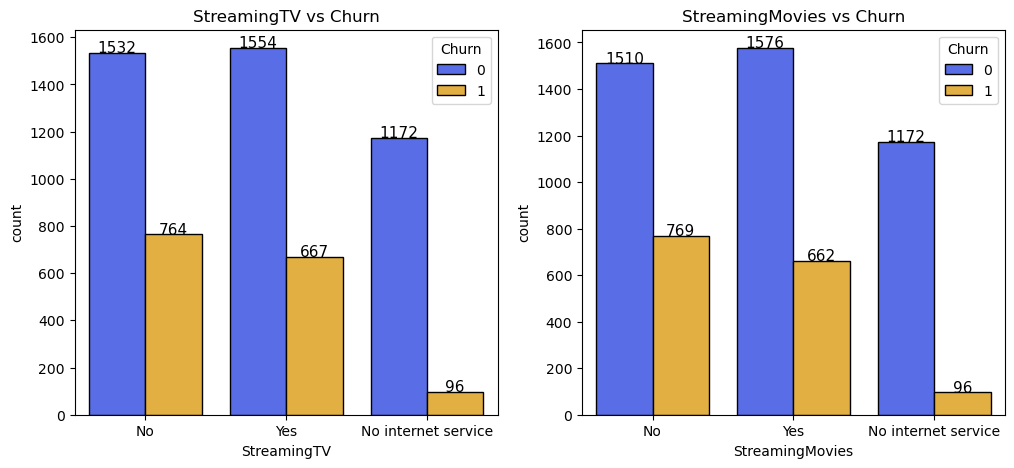

In [17]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(l2[i],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(l2[2],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(l2[i + 3],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title);

- For PhoneService, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.
- In case of MultipleLines, churn rate in when the Multiplelines are present or not is the same.
- A high number of customers have displayed their resistance towards the use of Fiber optic cables for providing the InternetService. On the contrary, from the above graph, customers prefer using DSL for their InternetService!
- StreamingTV and StreamingMovies display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned. Looks like the streaming content was not entirely at fault!

#### Group 2: Services Subscribed by the Customer :
        
OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

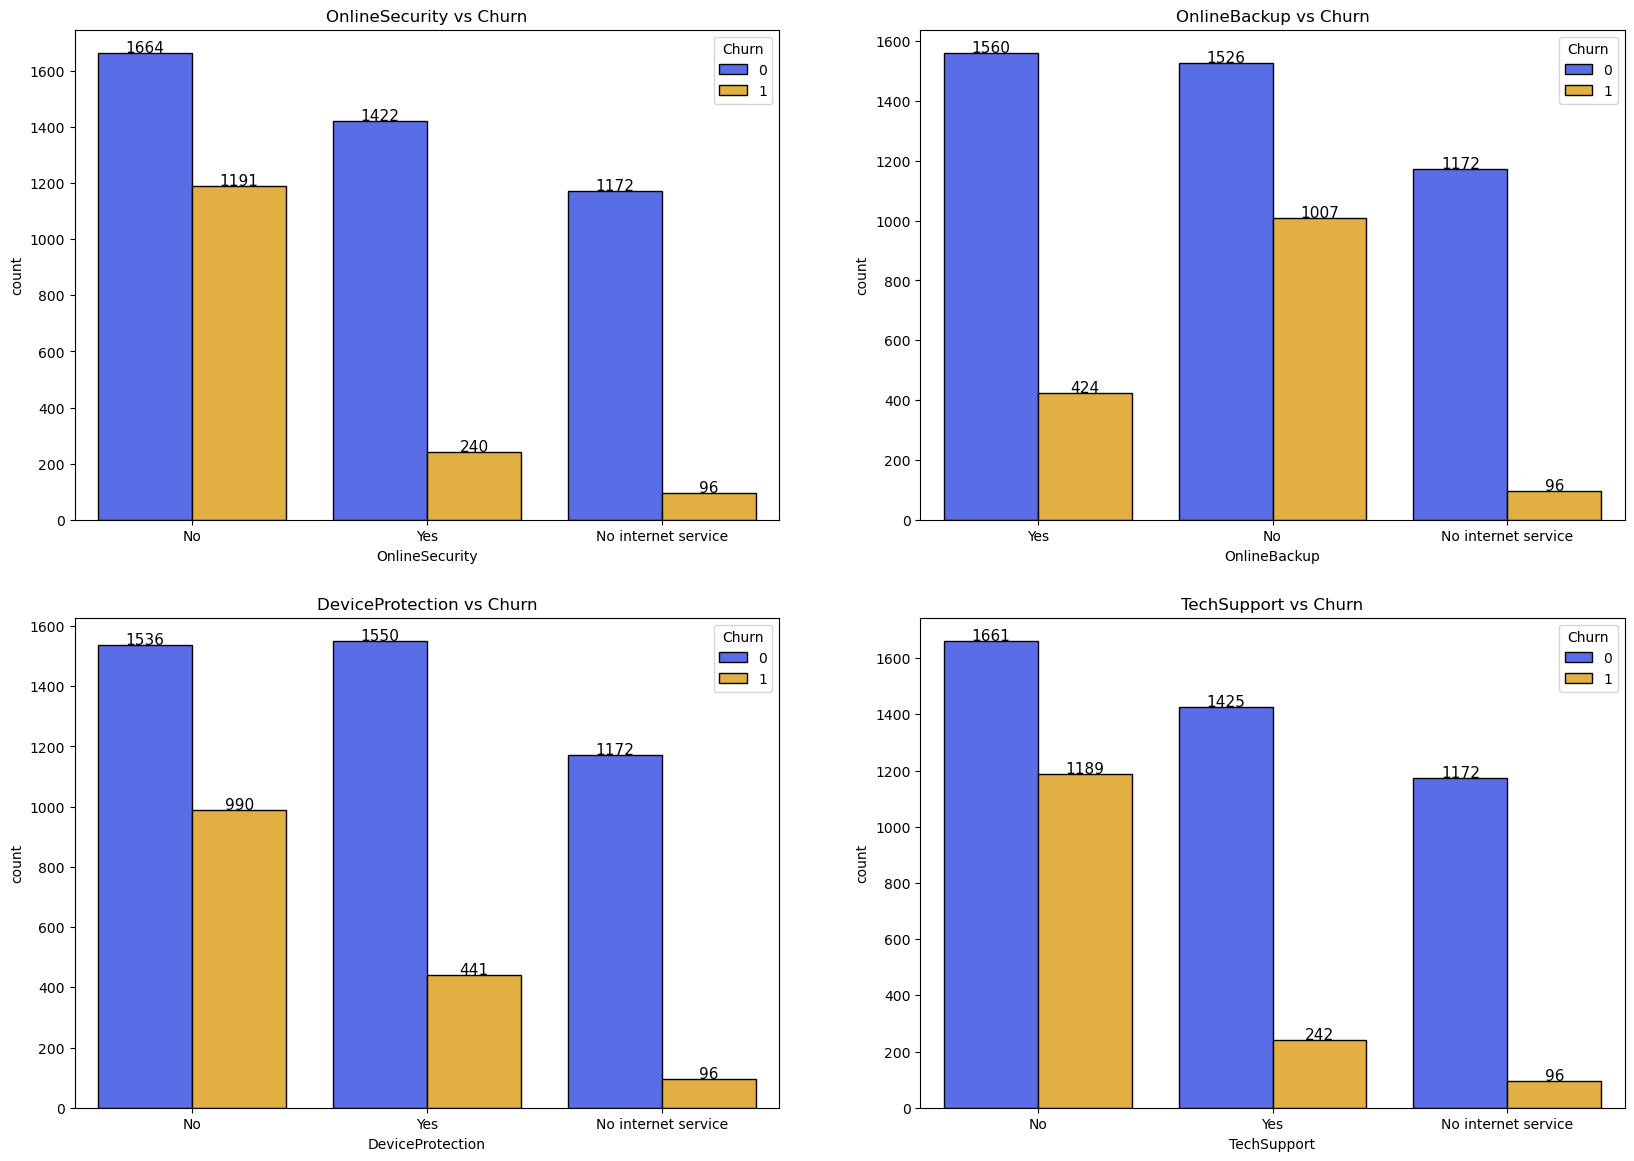

In [18]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(l2[-4 + i],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

- When it comes down to catering the customers, services w.r.t OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport are crucial from the above visualizations!
- A high number of customers have switched their service provider when it comes down poor services with the above mentioned features.

#### Group 3 : Contract | PaperlessBilling | PaymentMethod |

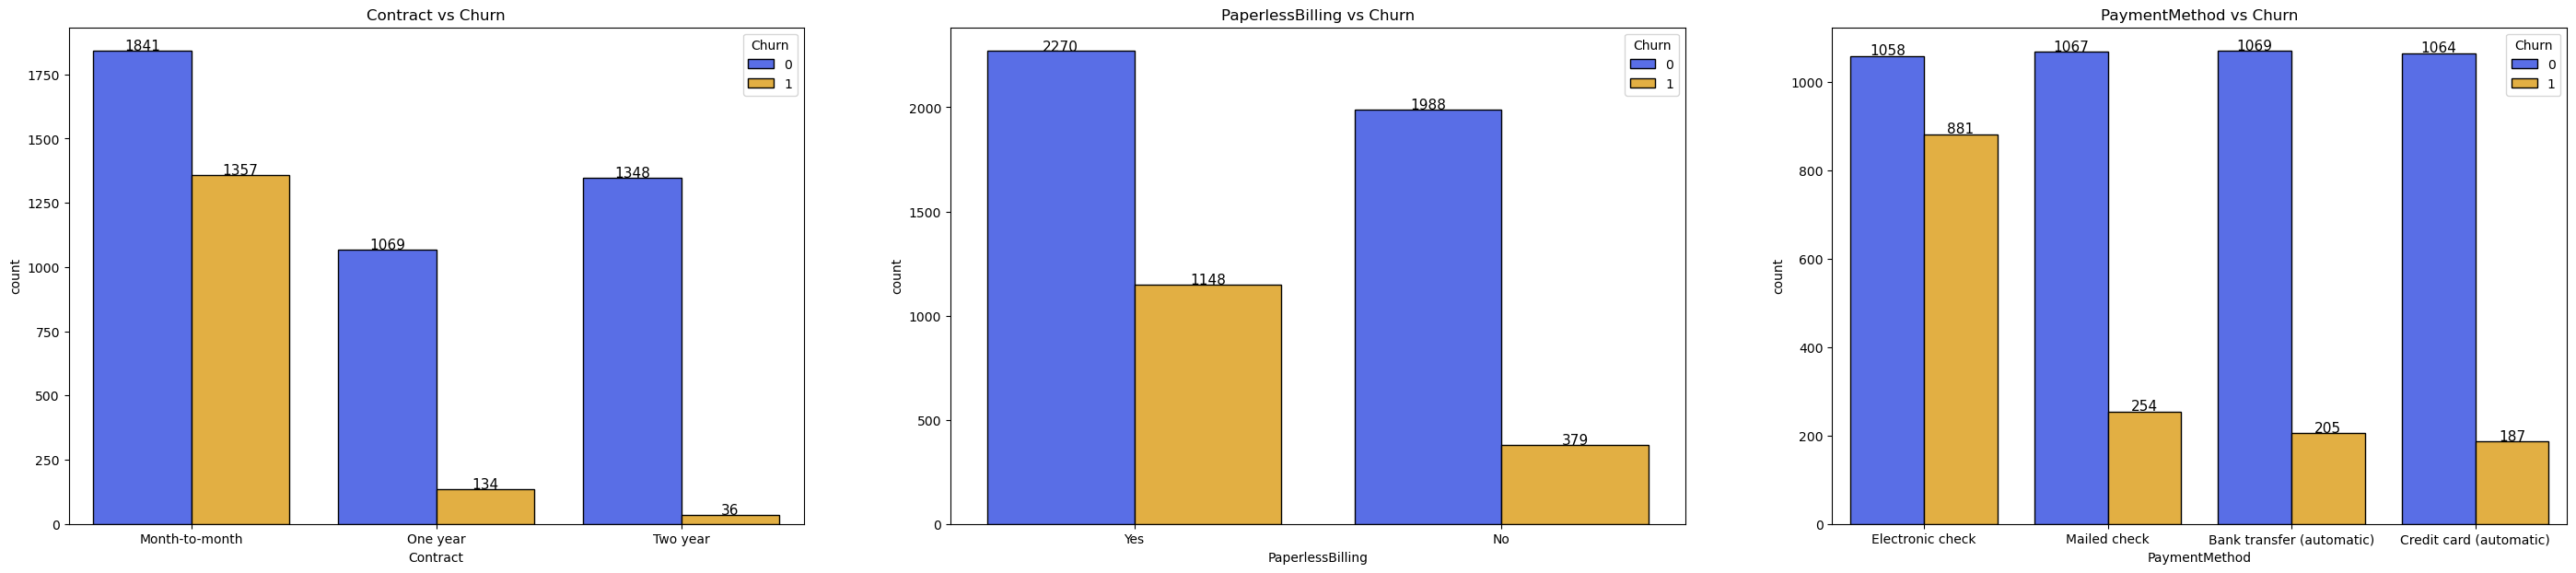

In [19]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (35,7))

plt.subplot(1,3,1)
ax = sns.countplot(l3[0],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(l3[1],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(l3[2],data = data,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);

- Customer churning for a Month-to-Month based Contract is quite high. This is probably because the customers are testing out the varied services available to them and hence, in order to save money, 1 month service is tested out!
- Another reason can be the overall experience with the internet service, streaming service and phone service were not consistent. Every customer has a different priority and hence if one of the 3 was upto par, the entire service was cutoff!
- PaperlessBilling displays a high number of customers being churned out. This is probably because of some payment issue or receipt issues.
- Customers clearly resented the Electronic check PaymentMethod. Out of the 2365 number of bills paid using Electronic check, a staggering 1071 customers exited the pool of service due to this payment method. Company definitely needs to either drop Electronic check method or make it hassle-free and user-friendly.

#### Categorical Features vs Positive Target Variable (Churn Cases) :

- We will now point our attention directly towards to the churn customers!

#### Group 1 : Customer Information :
        
gender | SeniorCitizen | Partner | Dependents |

In [20]:
gender = df1[df1['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = df1[df1['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df1[df1['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df1[df1['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

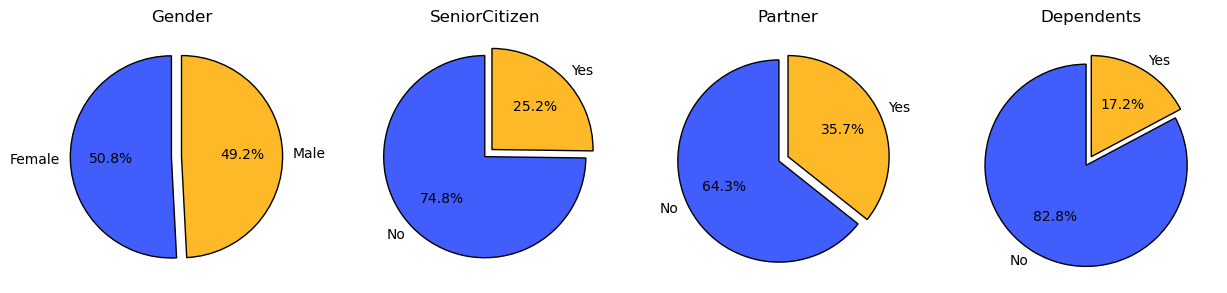

In [21]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

- We can observe a clear cut 50% - 50% split between the male and female customers that have switched their services. Hence, the reason for switching is something related to the service or some process which the customers reacted badly!
- 75% of the churned customers are not SeniorCitizen! This is a major info that the company needs to divert it's attention towards!
- Customers living by themselves have cutoff the services. From Partners & Dependents data, average of 73.4% of customers churned out were living by themselves.

#### Group 2: Services Subscribed by the Customer :
        
PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

In [22]:
phoneservice = df1[df1['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df1[df1['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = df1[df1['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = df1[df1['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = df1[df1['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes 

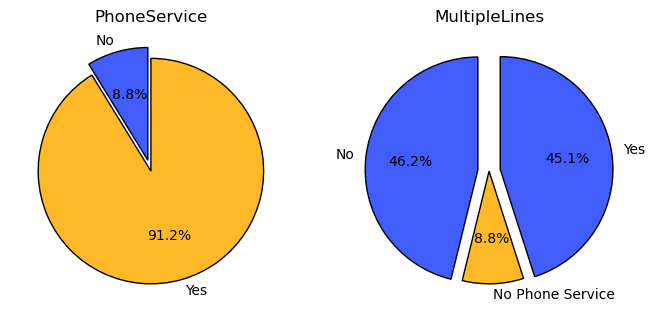

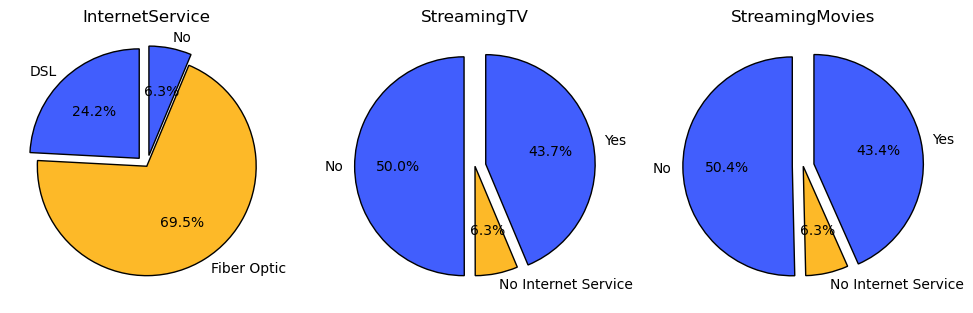

In [23]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');

- Despite providing PhoneService, a high percentage of customers have switched!
- Similarly, availability of MultipleLines did not matter, as customer unsubscription was carried out regardless!
- Customers definitely did not appreciate the approach of Fiber Optic cables for providing InternetService with a solid 70% opting out from the services!
- For StreamingTV & StreamingMovies, customers without these services definitely cancelled their subscription, however an average of 43.7% of customers switched despite consuming the streaming content.

#### Group 2: Services Subscribed by the Customer :

OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

In [24]:
onlinesecurity = df1[df1['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes 

onlinebackup = df1[df1['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 

deviceprotection = df1[df1['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 

techsupport = df1[df1['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

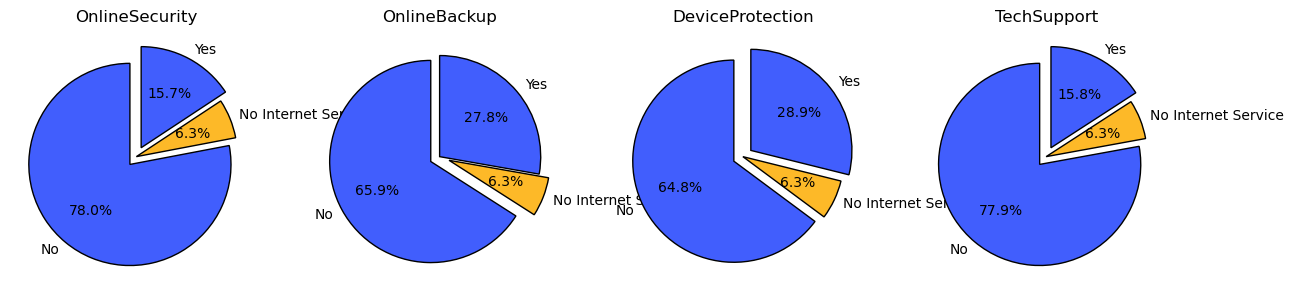

In [25]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');

Above pie charts stress out the significance of providing OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport as an average of 71.6% customers cutoff their services due to lack of these features!

#### Group 3 : Contract | PaperlessBilling | PaymentMethod |

In [26]:
contract = df1[df1['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df1[df1['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = df1[df1['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check

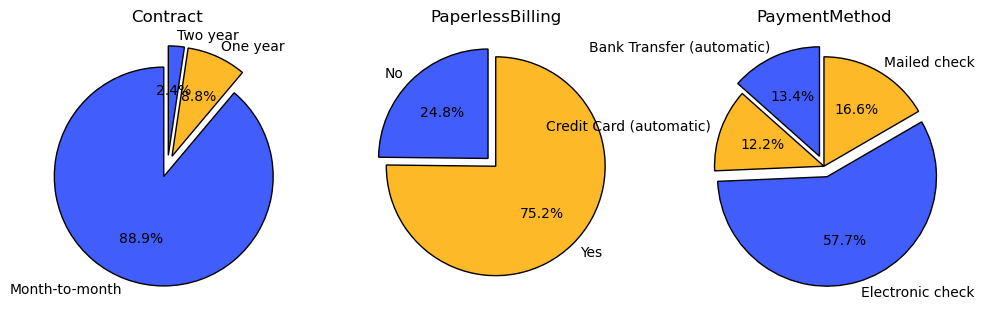

In [27]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');

- Month-to-Month Contract duration has the dominating share when it comes churning with a massive 88.6% customers!
- PaperlessBilling does not seemed to be appreciated by the customers!
- Electronic check definitely needs to be sorted as it accounts for 57.3% of churn. It is then followed by Mailed check, Bank Transfer (automatic) & Credit Card (automatic)!

#### Numerical Features :

Distribution of Numerical Features :

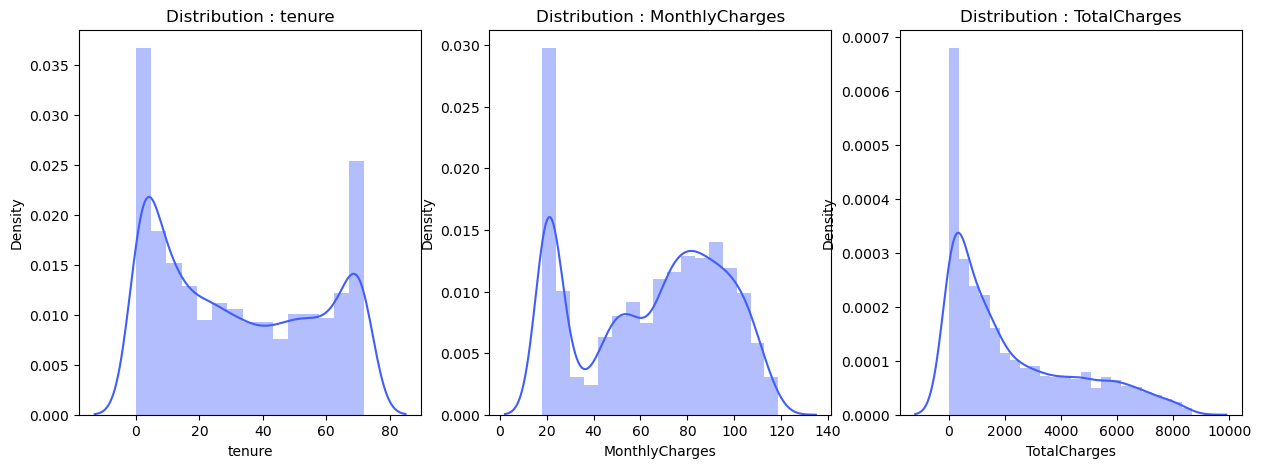

In [28]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

- tenure and MonthlyCharges kind of create a bimodal distribution with peaks present at 0 - 70 and 20 - 80 respectively.
- TotalCharges displays a positively or rightly skewed distribution.

#### Numerical Features w.r.t Target Variable (Outcome) :

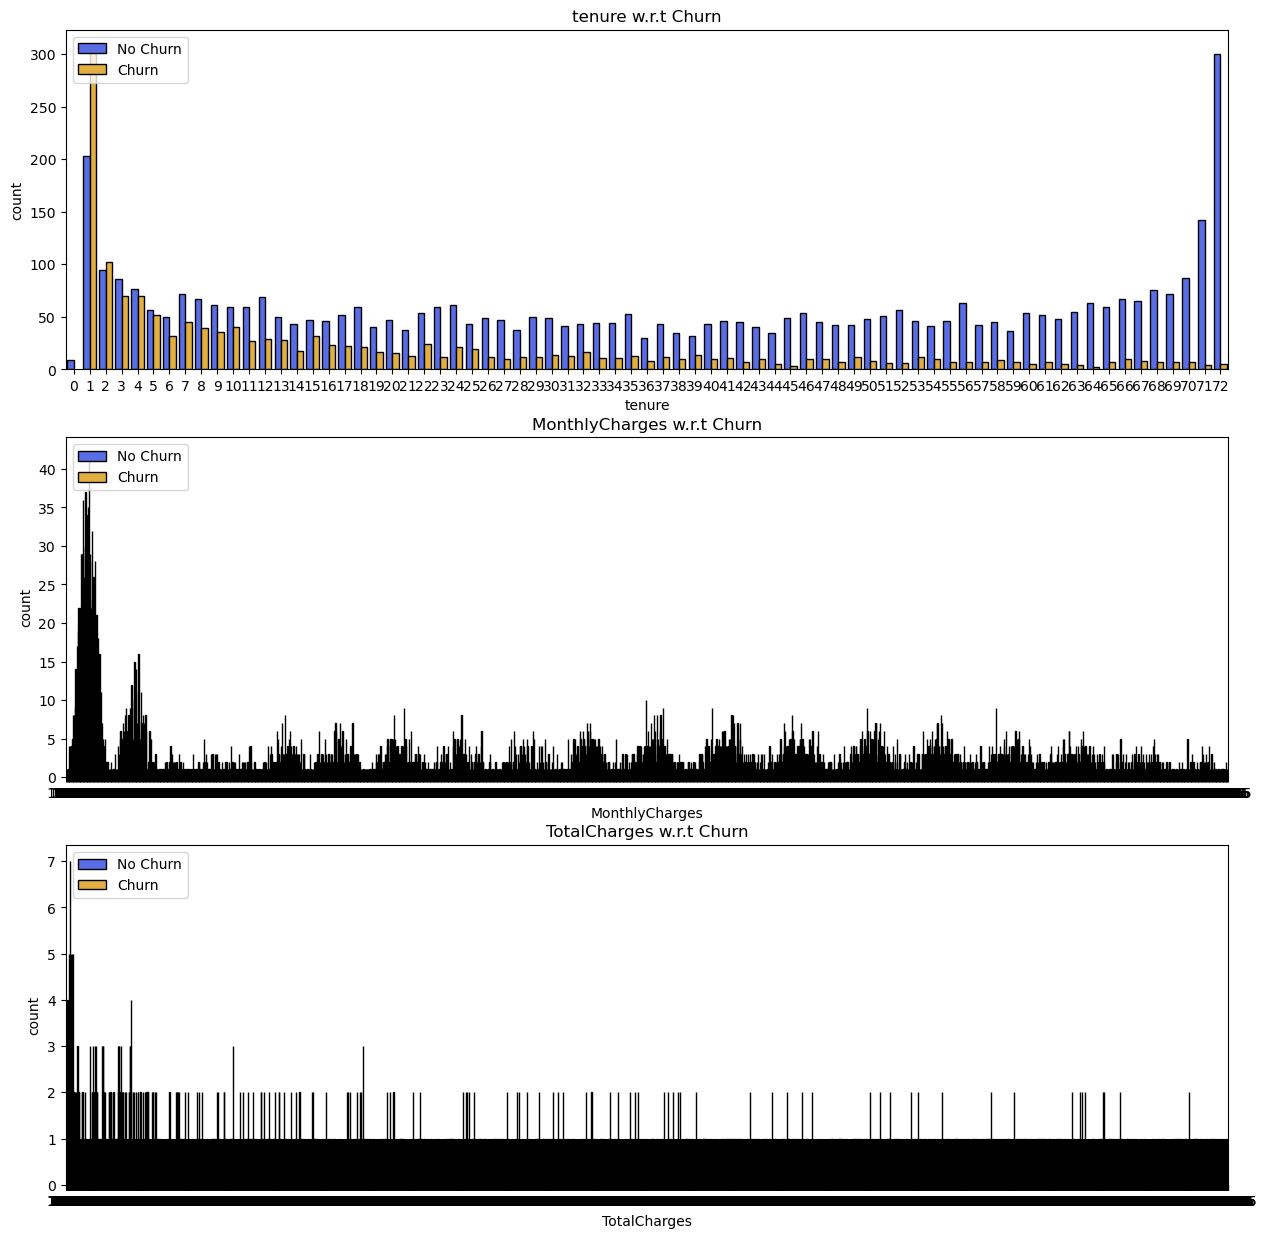

In [29]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(numerical_features[i],data = df1,hue = "Churn",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numerical_features[i] + ' w.r.t Churn'
    plt.title(title);

- Considering tenure, a high number of customers have left after the 1st month. This high cancellation of services continues for 4 - 5 months but the churn customers have reduced since the 1st month. As the tenure increases, customers dropping out decreases.
- This results in low customer churning as the tenure increases. It displays a symmetrical graph with the left side dominating with churn numbers and right side dominating with low churn numbers.
- Because of too many unique data points in MonthlyCharges & TotalCharges, it is difficult to gain any type of insight. Thus, we will scale these numerical features for understandable visualization and gaining insights purposes. This brings the varied data points to a constant value that represents a range of values.
- Here, we divide the data points of the numerical features by 5 or 500 and assign its quotient value as the representative constant for that data point. The scaling constants are decided by looking into the data & intuition.

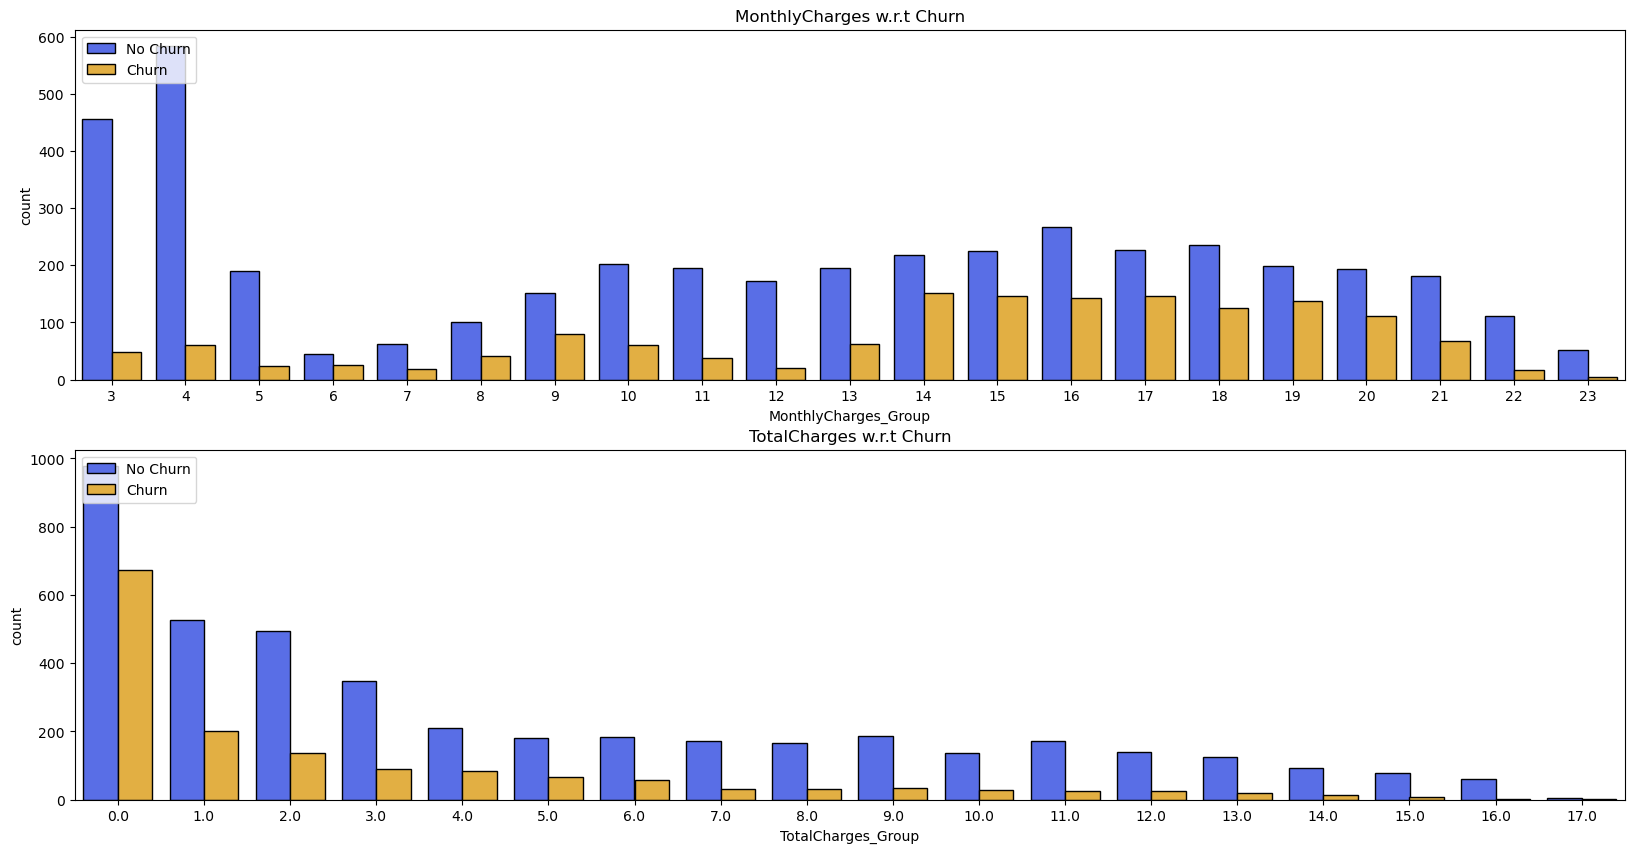

In [30]:
# Create 'MonthlyCharges_Group' based on dividing by 5
df1['MonthlyCharges_Group'] = [int(i / 5) for i in df1['MonthlyCharges']]

# Create 'TotalCharges_Group' based on dividing by 500, handling NaN values
df1['TotalCharges_Group'] = [int(i / 500) if not np.isnan(i) else np.nan for i in df1['TotalCharges']]

# Plotting
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
for i in range(len(numerical_features[1:])):
    plt.subplot(2, 1, i + 1)
    sns.countplot(numerical_features[1 + i] + '_Group', data=df1, hue="Churn", palette=colors, edgecolor='black')
    plt.legend(['No Churn', 'Churn'], loc='upper left')
    title = numerical_features[1 + i] + ' w.r.t Churn'
    plt.title(title)

- For MonthlyCharges group, churn rate is high for the values between 65 (13x5) - 105 (21x5). This MonthlyCharges range of values caused the customers to switch.
- A very high number of customers opted out of the services for the TotalCharges below 500. This customer churning continues for a TotalCharges range of values from 0 (0x500) - 1000 (2x500).

#### Numerical features vs Categorical features w.r.t Target variable (Churn) :

tenure vs Categorical Features :

tenure vs Group 1 : Customer Information : gender | SeniorCitizen | Partner | Dependents |

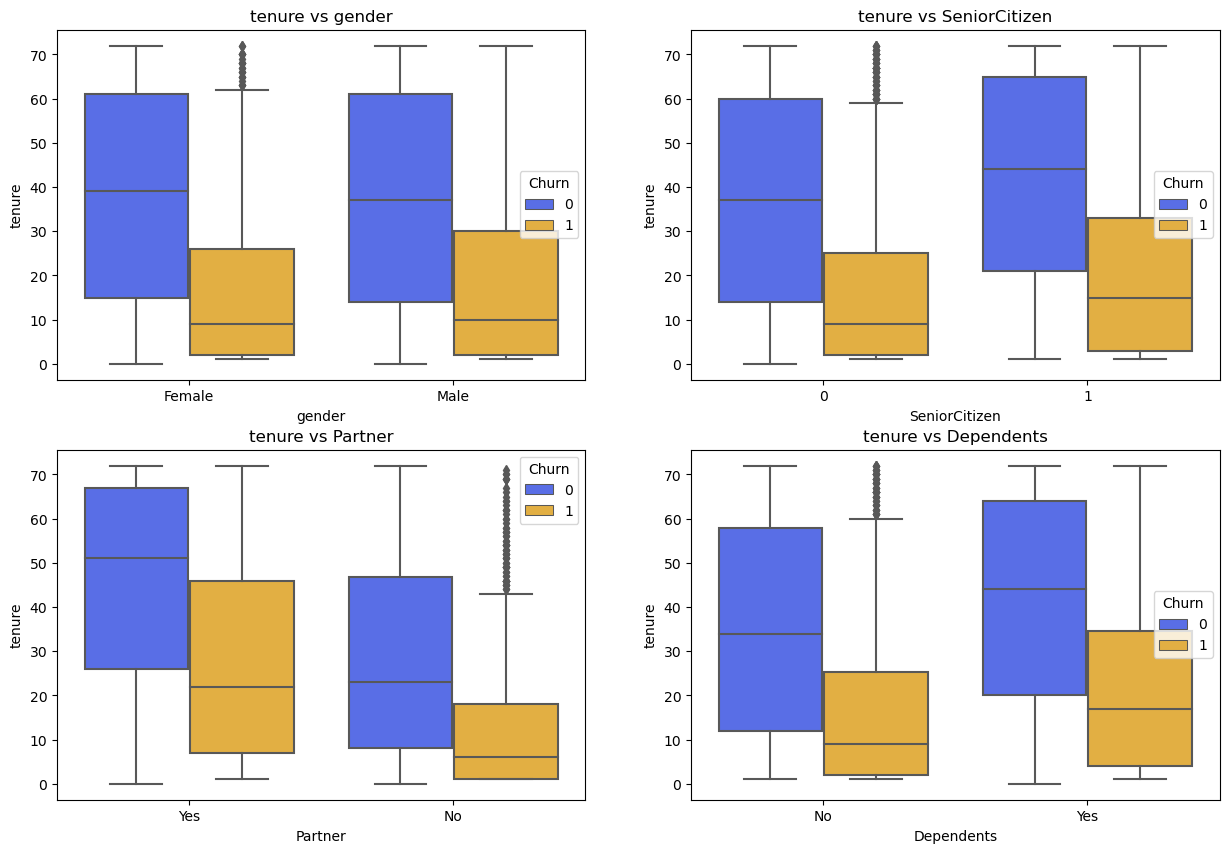

In [31]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'tenure',data = data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l1[i]);

- Male & Female customer churn graphs are very similar.
- SeniorCitizen opted out from the services for a tenure values of 0 - 35 months. 20 - 35 months is the kind of decision making period about whether to continue or swtich for SeniorCitizen.
- Similarly, customers with partners continued with the service for a tenure of 5 - 45 months.

#### tenure vs Group 2: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

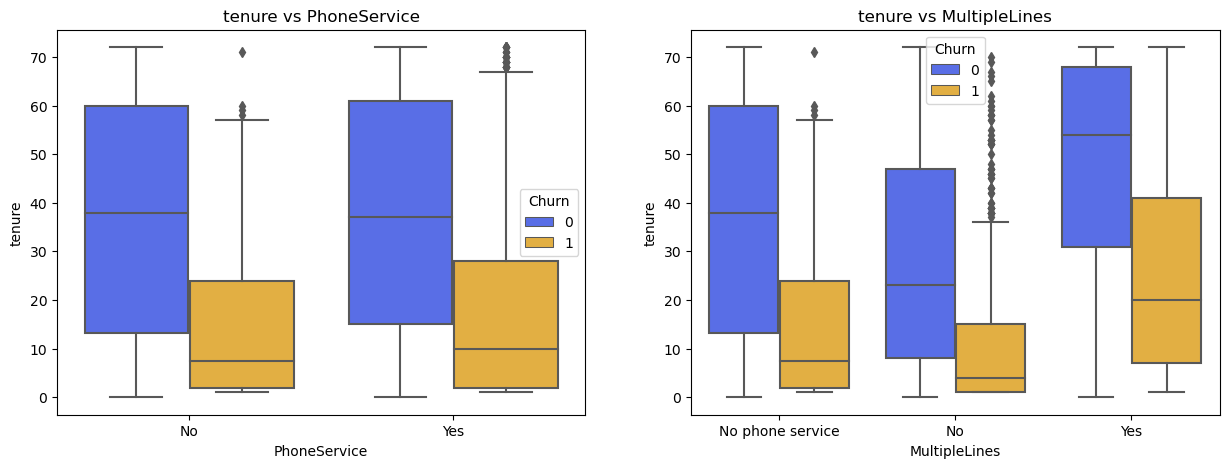

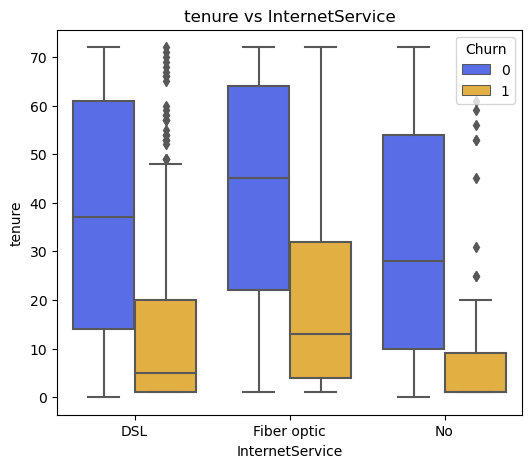

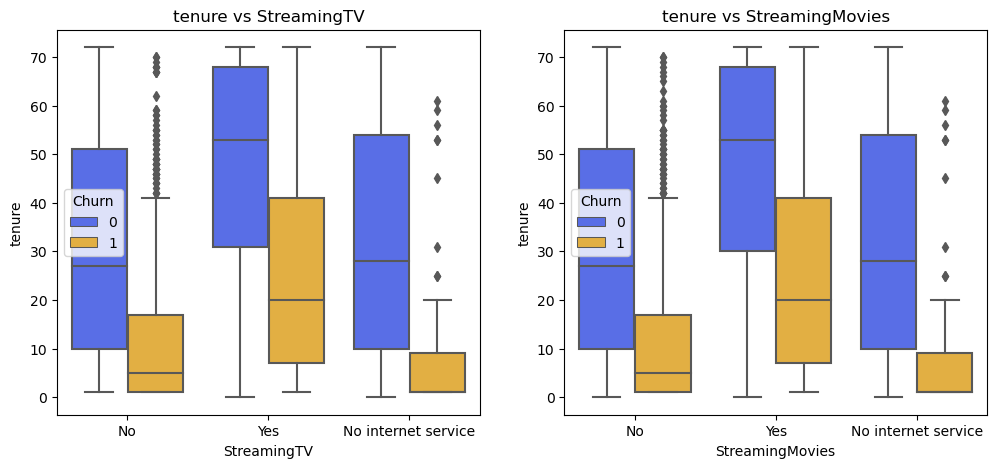

In [32]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'tenure',data = data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'tenure',data = data,hue = 'Churn',palette = colors);
plt.title('tenure vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'tenure',data = data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i + 3]);

- Presence of MutipleLines pushes the median MonthlyCharges irrespective if the customers opt out of the services or not.
- For the graph of tenure vs PhoneService, availability of PhoneService or not display a mirroring visuals. Customers were probably not heavy phone (call - message) users.
- For InternetService, customers seem to be very skeptical about the usage of Optic Fibre cables as the churning lasted for about 30 - 35 months before either carrying it forward or switching to a new one!
- Similary for StreamingTV & StreamingMovies, a churn tenure period of about 10 - 40 months can be observed!

#### tenure vs Group 2: Services Subscribed by the Customer : 

OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

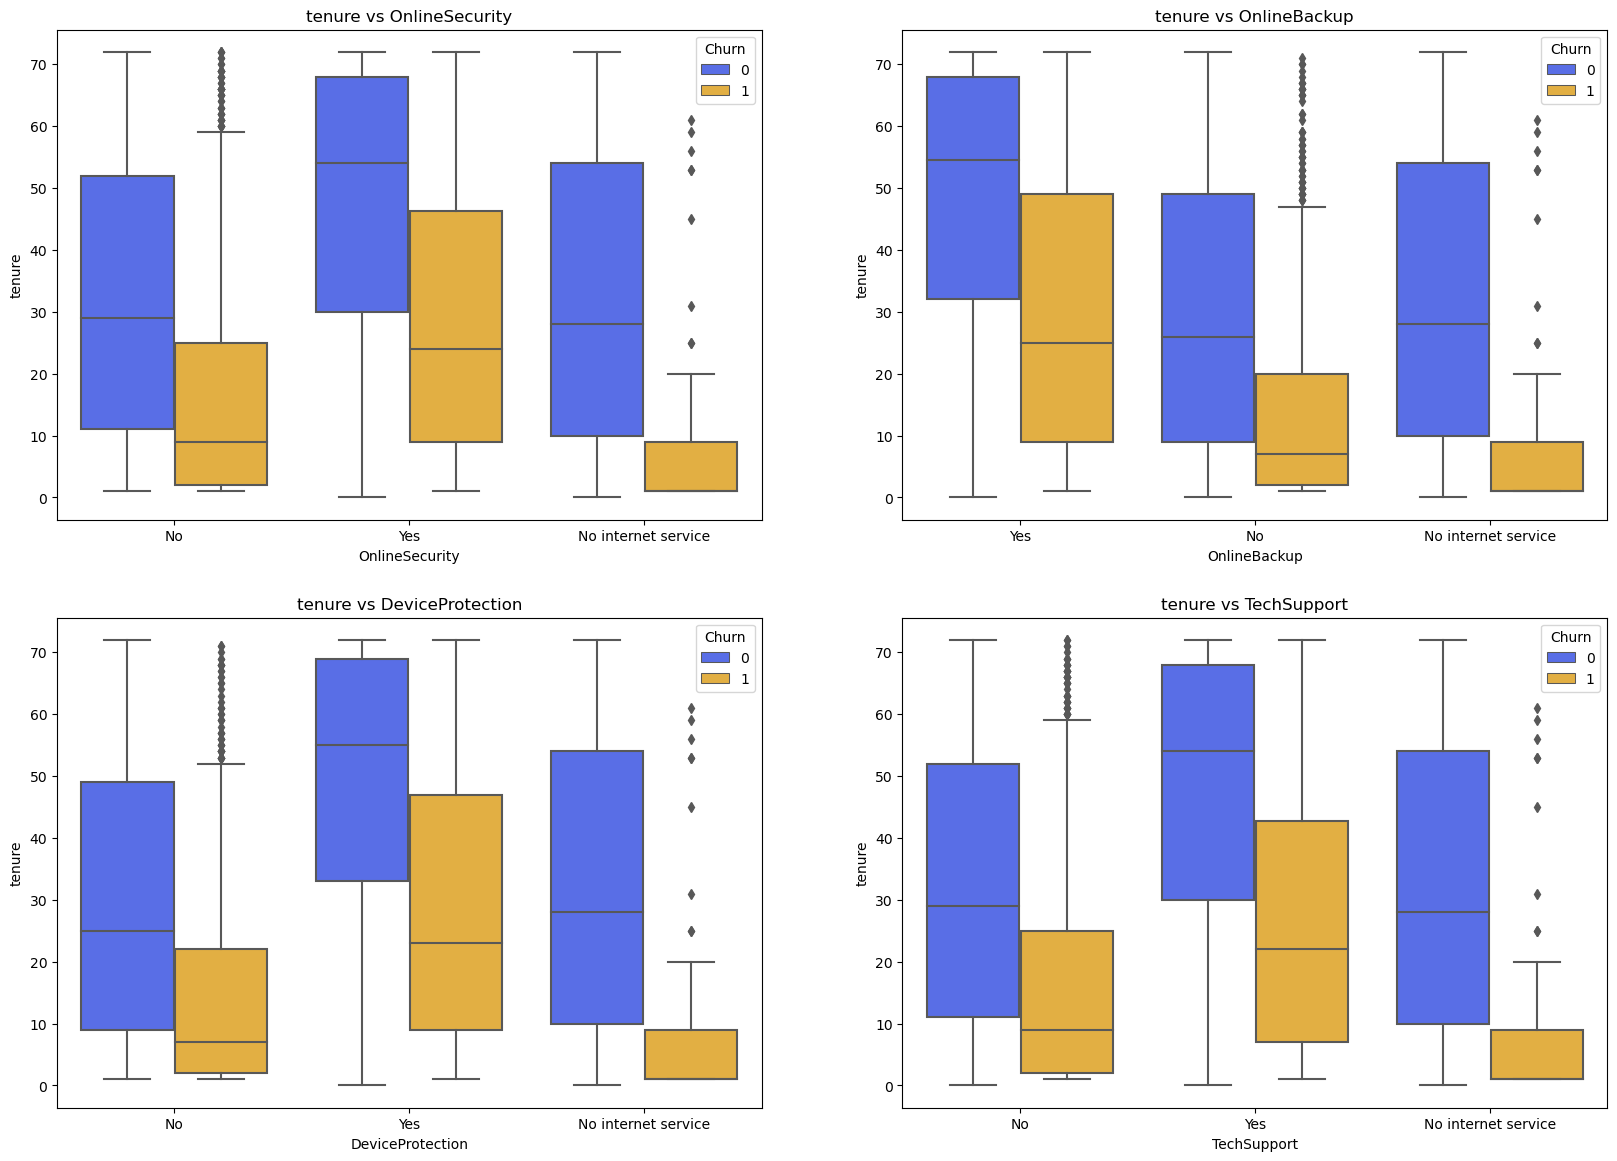

In [33]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'tenure',data = data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i-4]);

- For OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport, median churn tenure value is of 25 months. The highest value of this churn tenure is of around 45 months.
- 30 - 35 month period is where the customers take a call about whether to continue with the current services or switch w.r.t above features!

tenure vs Group 3 : Contract | PaperlessBilling | PaymentMethod |

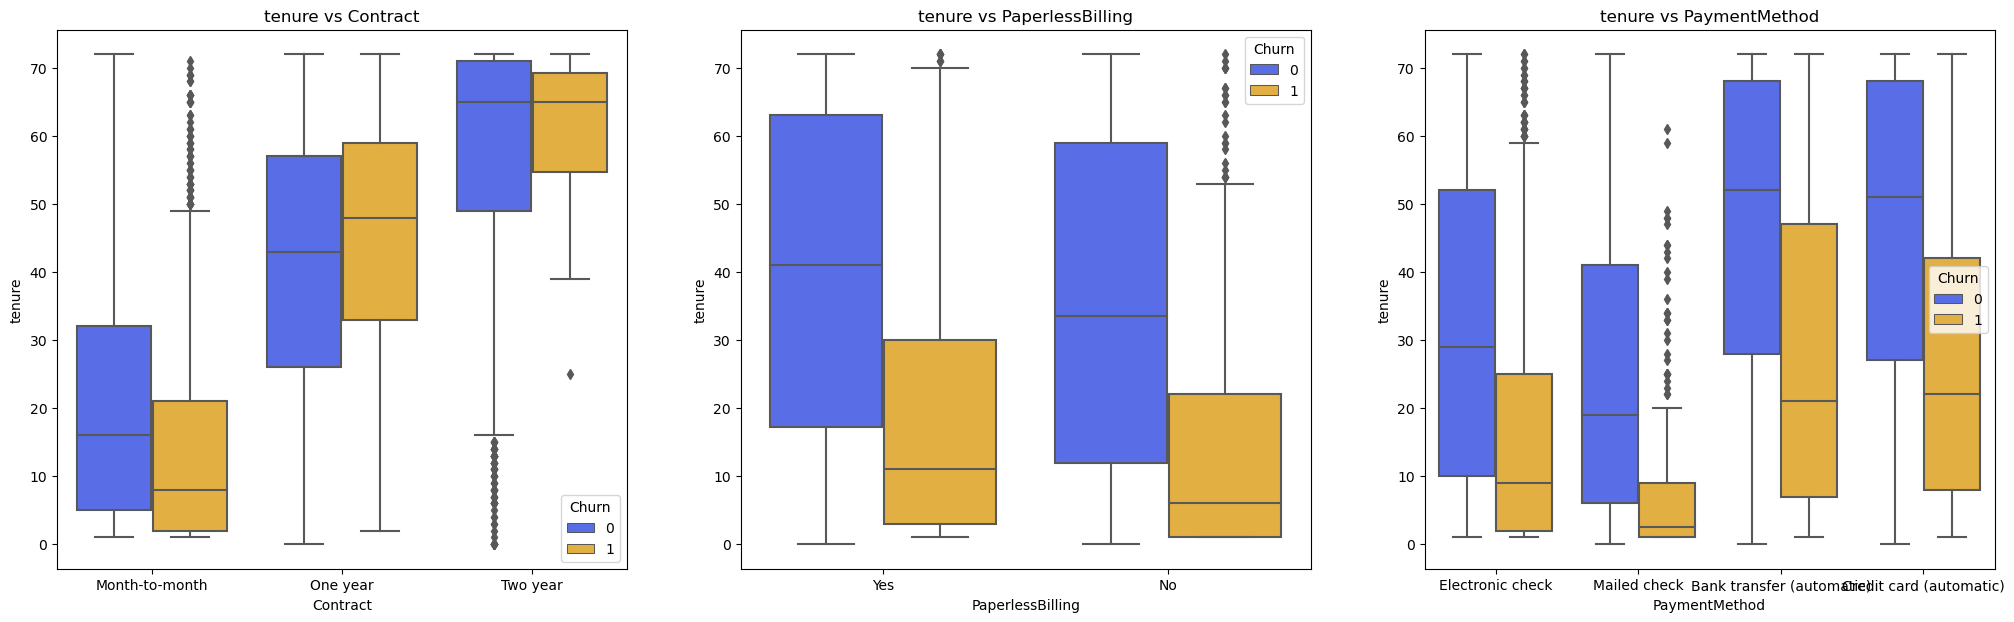

In [34]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'tenure',data = data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l3[i]);

- When customers sign One year and Two year contracts for the services, they seem to continue with the services for about 25 and 45 months respectively! However, they start questioning the services and think about switching from the 35 month and 55 month mark respectively!
- Irrespective of the PaperlessBilling, customers think of switching right from the 1st month.
- When it comes to PaymentMethod, median churn tenure of Bank Transfer (automatic) & Credit Card (automatic), above 20 months, is nearly double than that of Electronic check & Mailed check, around 10 months & around 5 months respectively.

#### MonthlyCharges vs Categorical Features :
    
MonthlyCharges vs Group 1 : Customer Information : gender | SeniorCitizen | Partner | Dependents |

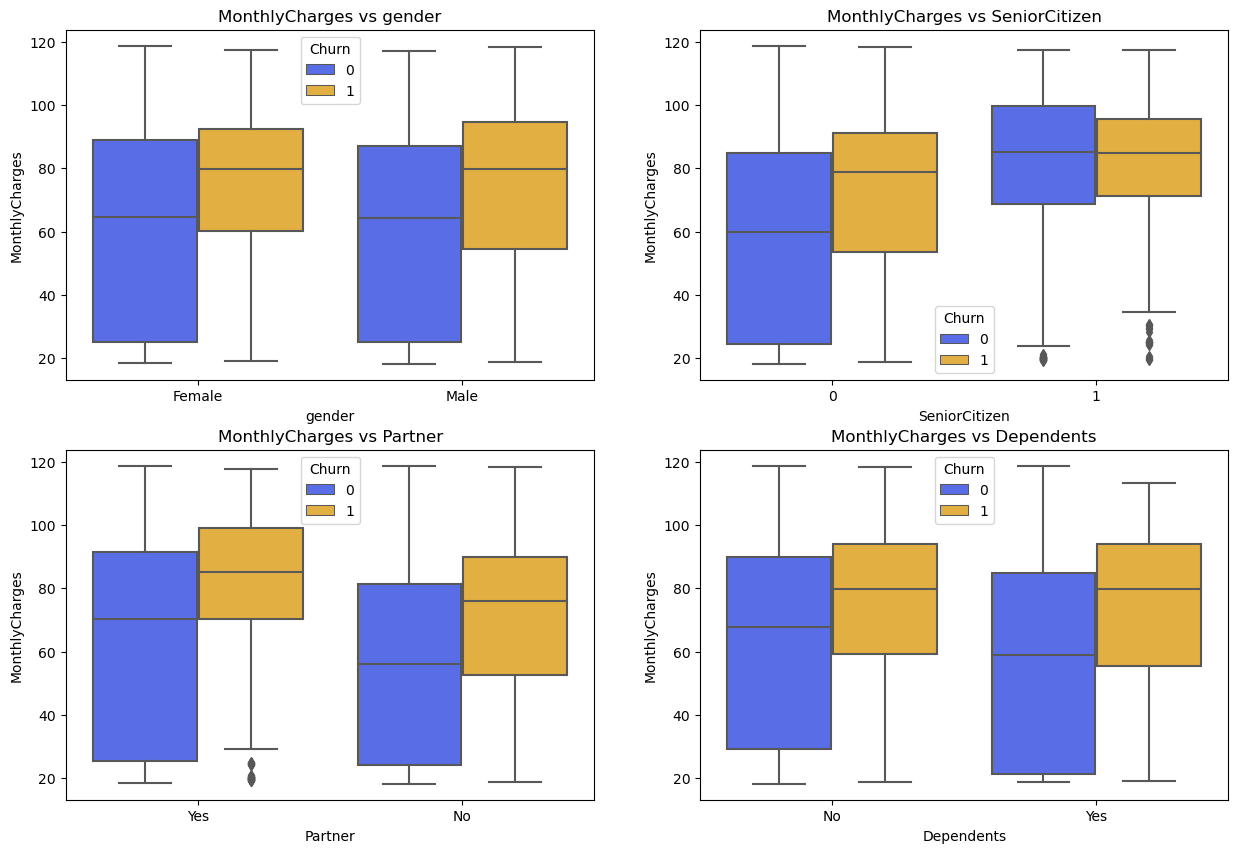

In [35]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors); 
    plt.title('MonthlyCharges vs ' + l1[i]);

- For all the features mentioned above, the median value of the not-churn customers is very close to the lower limit of the churn customers.
- Male & Female customers have the same median MonthlyCharges of around 60. For SeniorCitizen, this value is pushed to 80.
- Customers living with Partner have a higher lower limit of churning, MonthlyCharges of 70, than those living alone, MonthlyCharges of just below 60!

#### MonthlyCharges vs Group 2: Services Subscribed by the Customer : 

PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

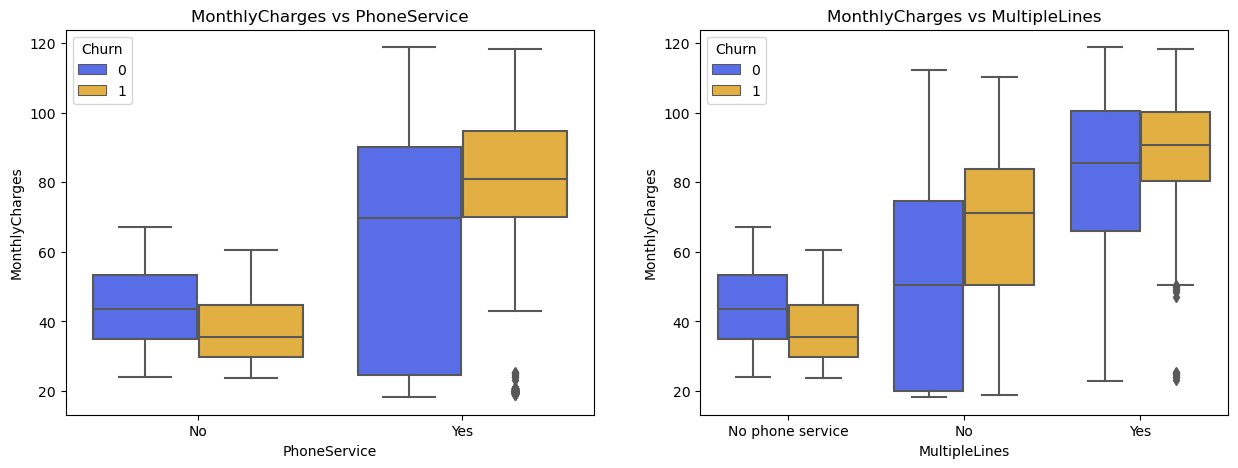

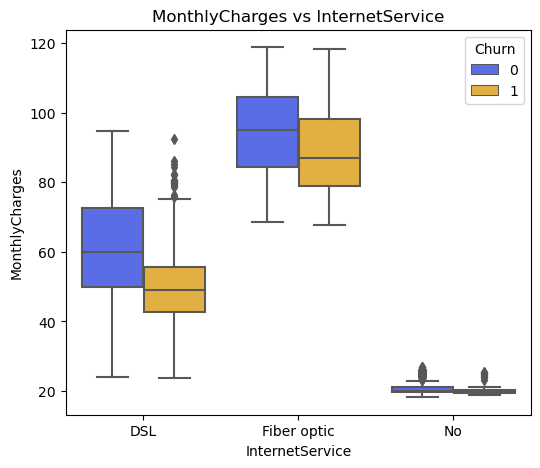

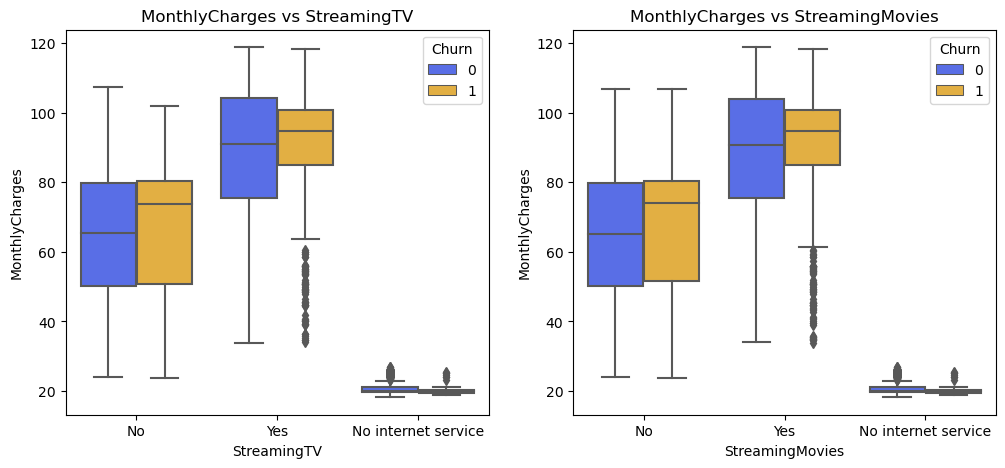

In [36]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors);
plt.title('MonthlyCharges vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i + 3]);

- MonthlyCharges of Fiber Optic cables is very high. Thus, it might be the reason for such high churn of customers.
- Similarly, MonthlyCharges of StreamingTV & StreamingMovies is quite high.
- Range of MonthlyCharges for PhoneService is from 25 - 85 but customers think of unsubscribing from 75 value of MonthlyCharges.

#### MonthlyCharges vs Group 2: Services Subscribed by the Customer : 

OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

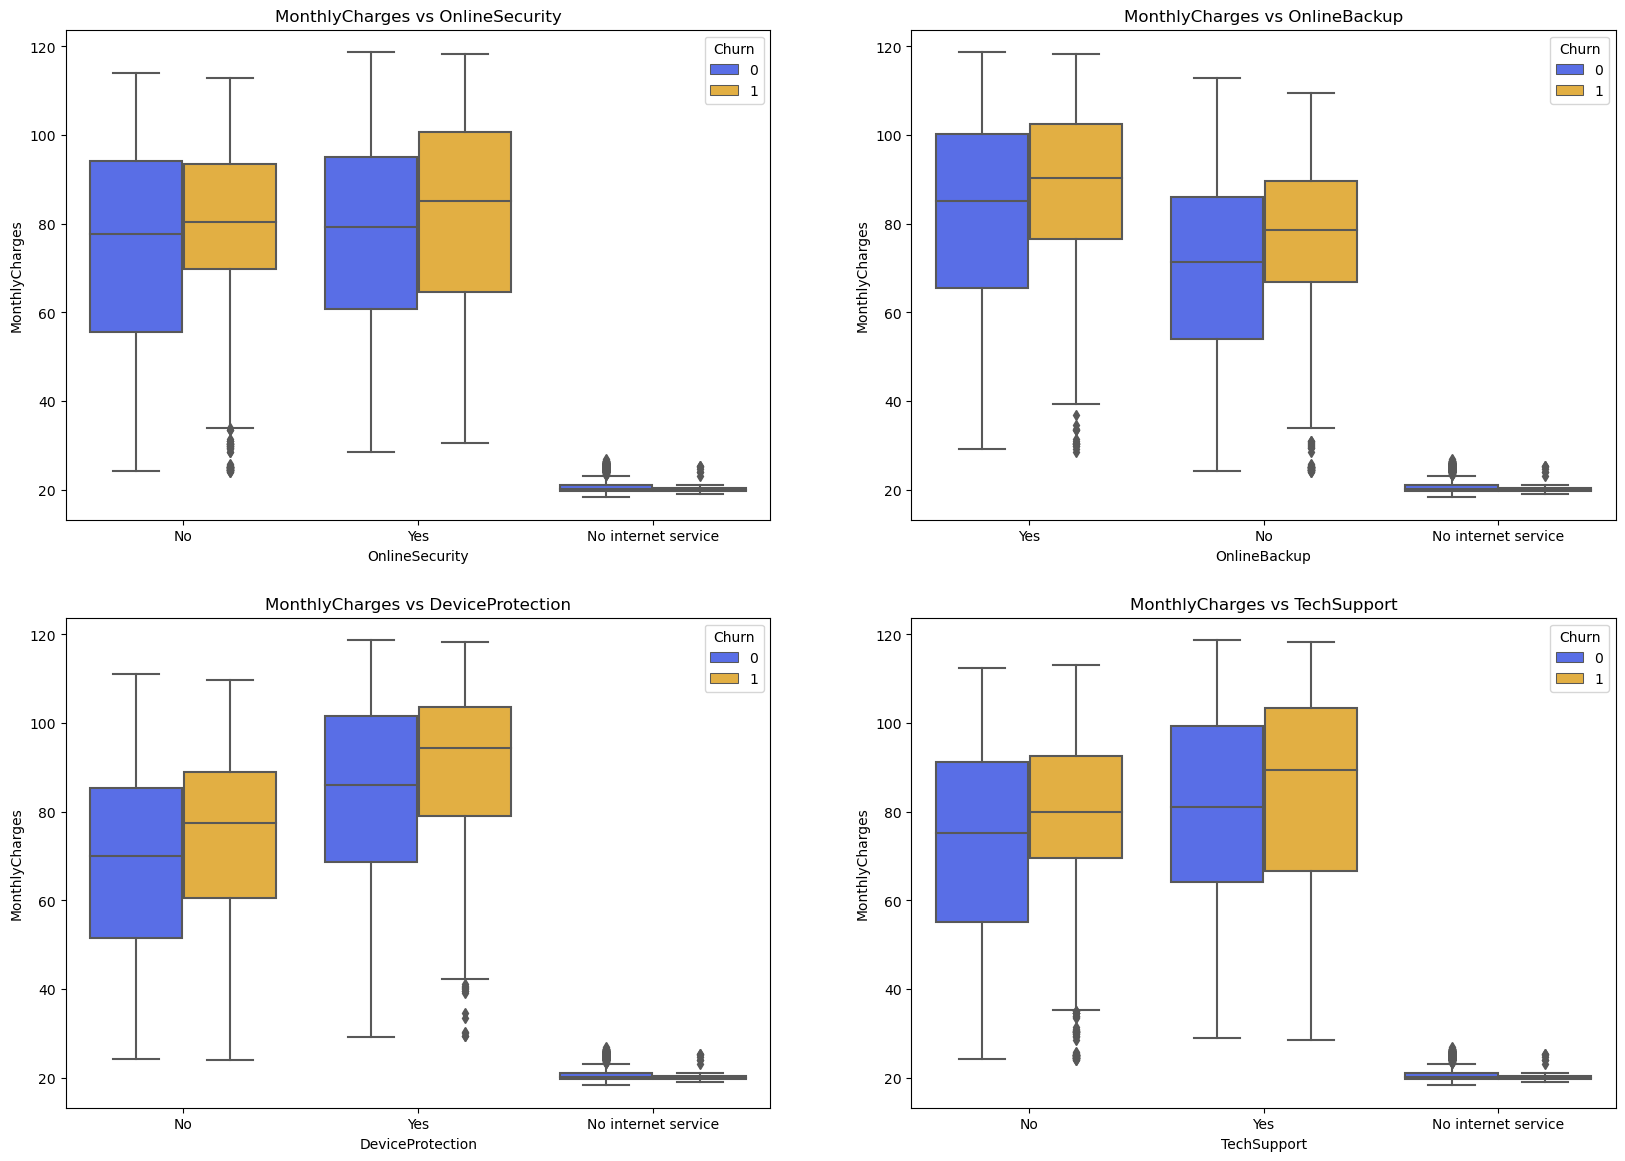

In [37]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i-4]);

- For OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport, range of values is from around 50 to 100.
- Customers who subscribe who to these services, probably don't think about cancelling the subscription due to MonthlyCharges as the range of values of customers who unsubscribe & continue is near about the same!

#### MonthlyCharges vs Group 3 : 
    
Contract | PaperlessBilling | PaymentMethod |

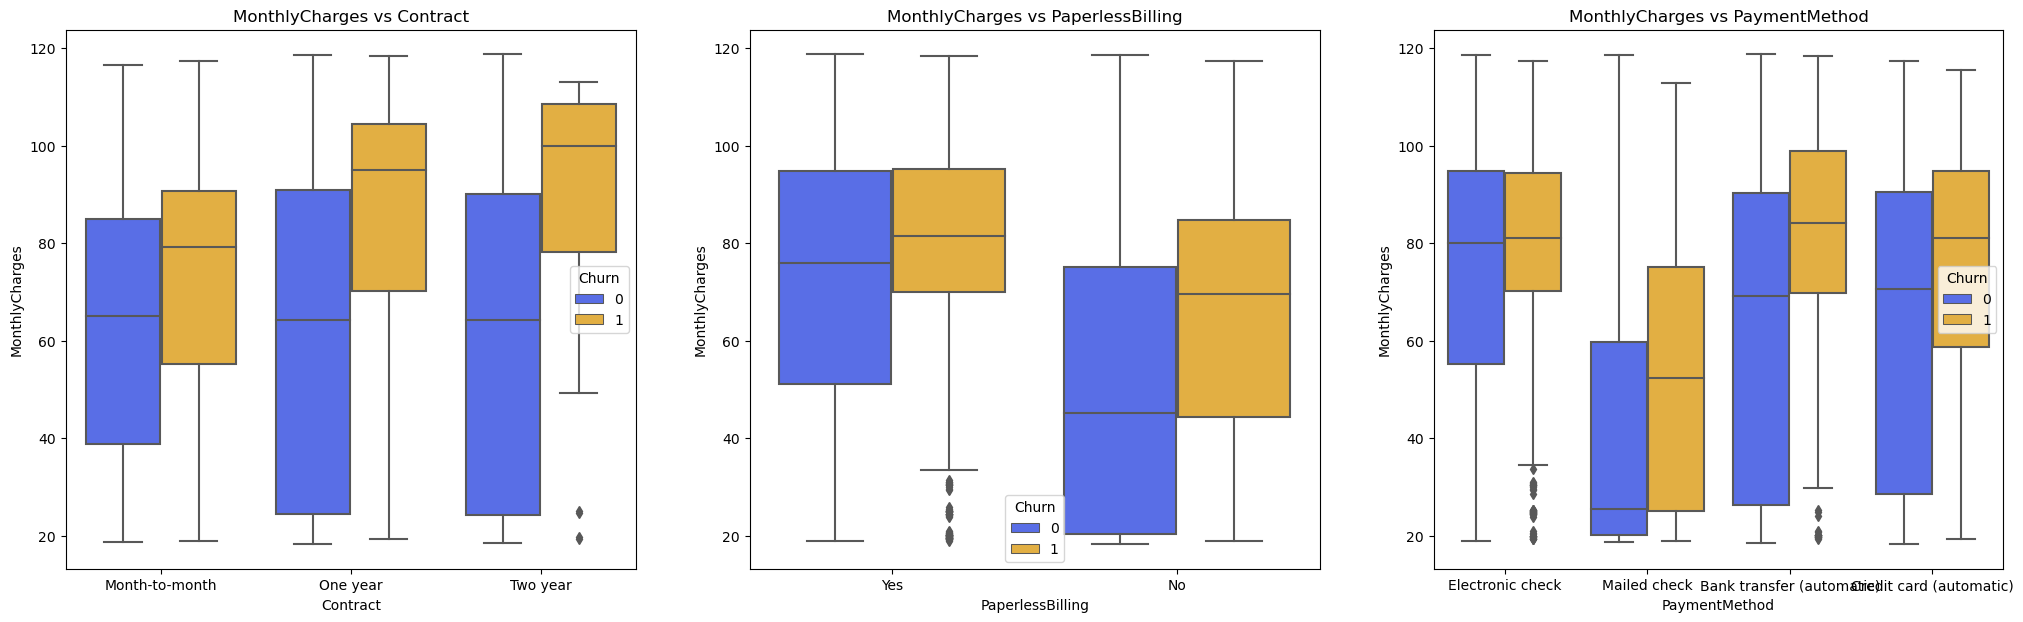

In [38]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'MonthlyCharges',data = data,hue = 'Churn',palette = colors);
    title = 'MonthlyCharges vs ' + l3[i]
    plt.title(title);

- Lower limit of the MonthlyCharges is higher for Month-to-Month contract than One year & Two year contracts. However the lower limit of the customers who discontinue the services is lower for Month-to-Month contract.
- Lower limit of the Electronic check is very high and it can be a huge factor due to which customers resent using it! Whereas Mailed check has the lowest starting values of customers who left and continued.

#### TotalCharges vs Categorical Features :

TotalCharges vs Group 1 : Customer Information : gender | SeniorCitizen | Partner | Dependents |

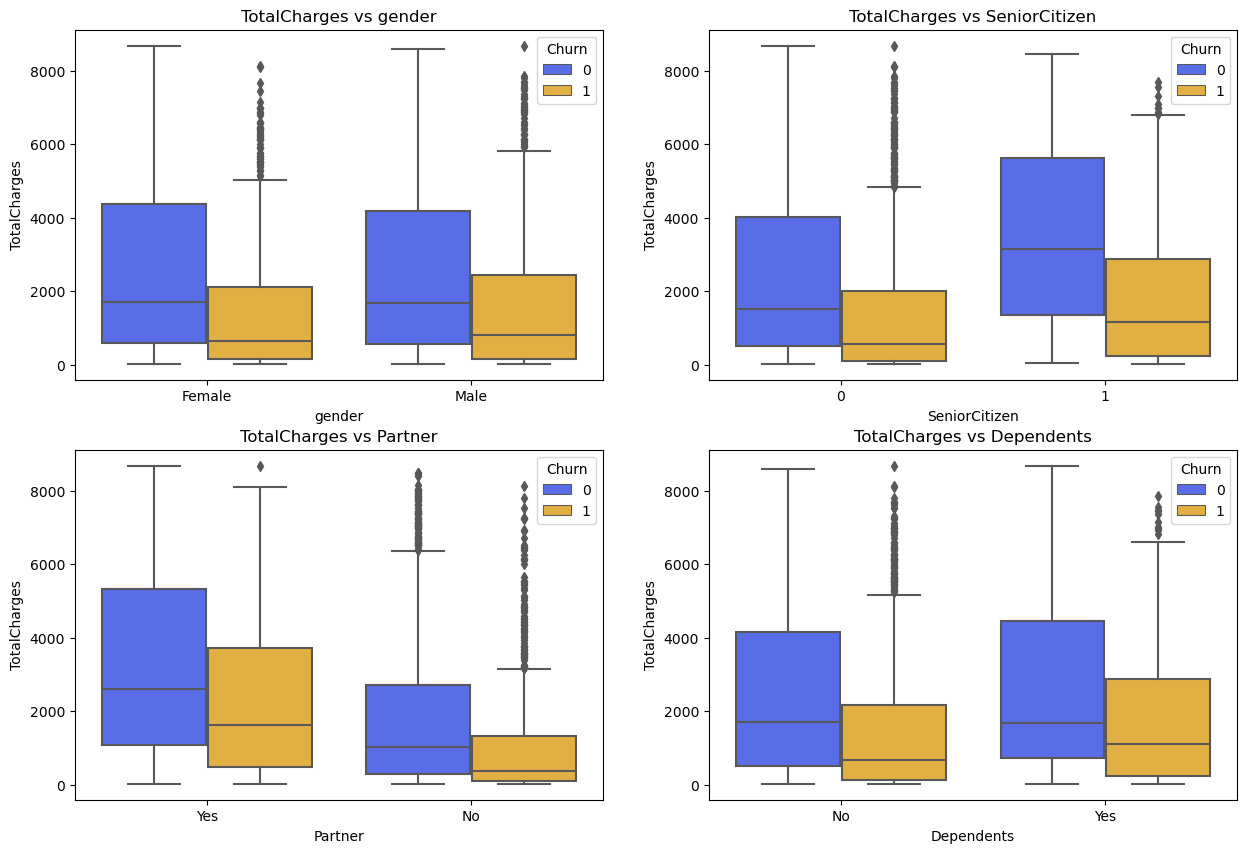

In [39]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'TotalCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l1[i]);

- TotalCharges for male & female customers is quite the same! SeniorCitizen that continued with the services have a higher starting and closing values of TotalCharges.
- Customers housing with their Partner have a higher median value of TotalCharges as compared to those living alone!

#### TotalCharges vs Group 2: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

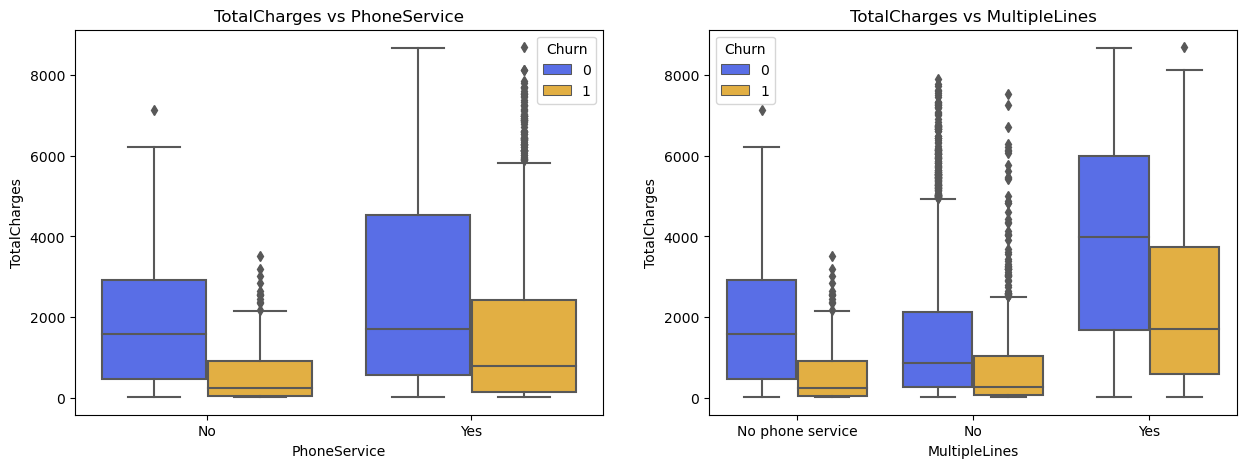

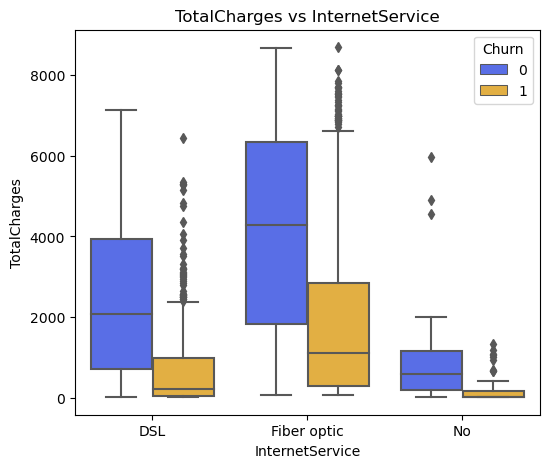

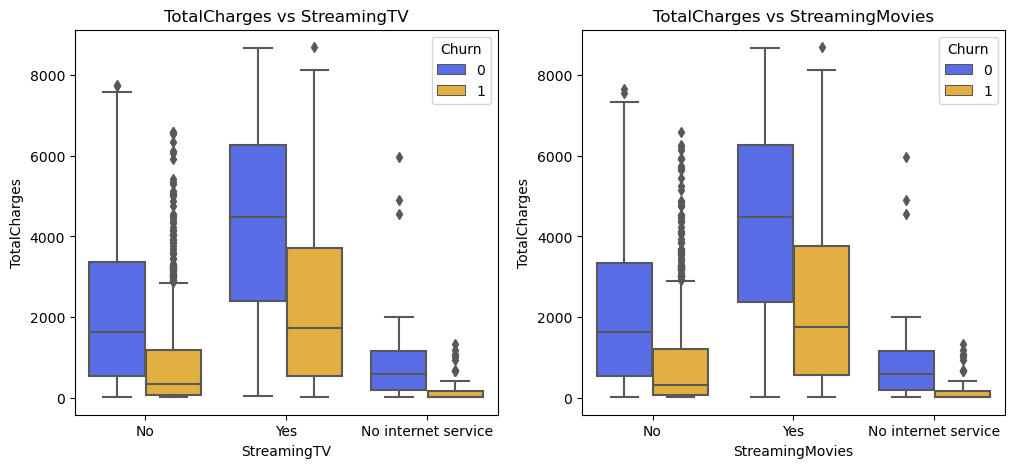

In [40]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'TotalCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'TotalCharges',data = data,hue = 'Churn',palette = colors);
plt.title('TotalCharges vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'TotalCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l2[i + 3]);

- TotalCharges of PhoneService range from 0 - 4000. However, customers start getting 2nd thoughts about PhoneService due to TotalCharges from around 1000.
- Similarly, customers start to hesitate to pay around 2000 for MultipleLines. However, some customers seem to be desperate for  MultipleLines as they paid a value of around 6000 for it!
- When it comes to paying for Fiber Optic cables, customers test out the products by paying around 2000!
- Similar to Fiber Optic, StreamingTV & StreamingMovies, customers that continue with the services pay from 3000 - 6000.

#### TotalCharges vs Group 2: Services Subscribed by the Customer : OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

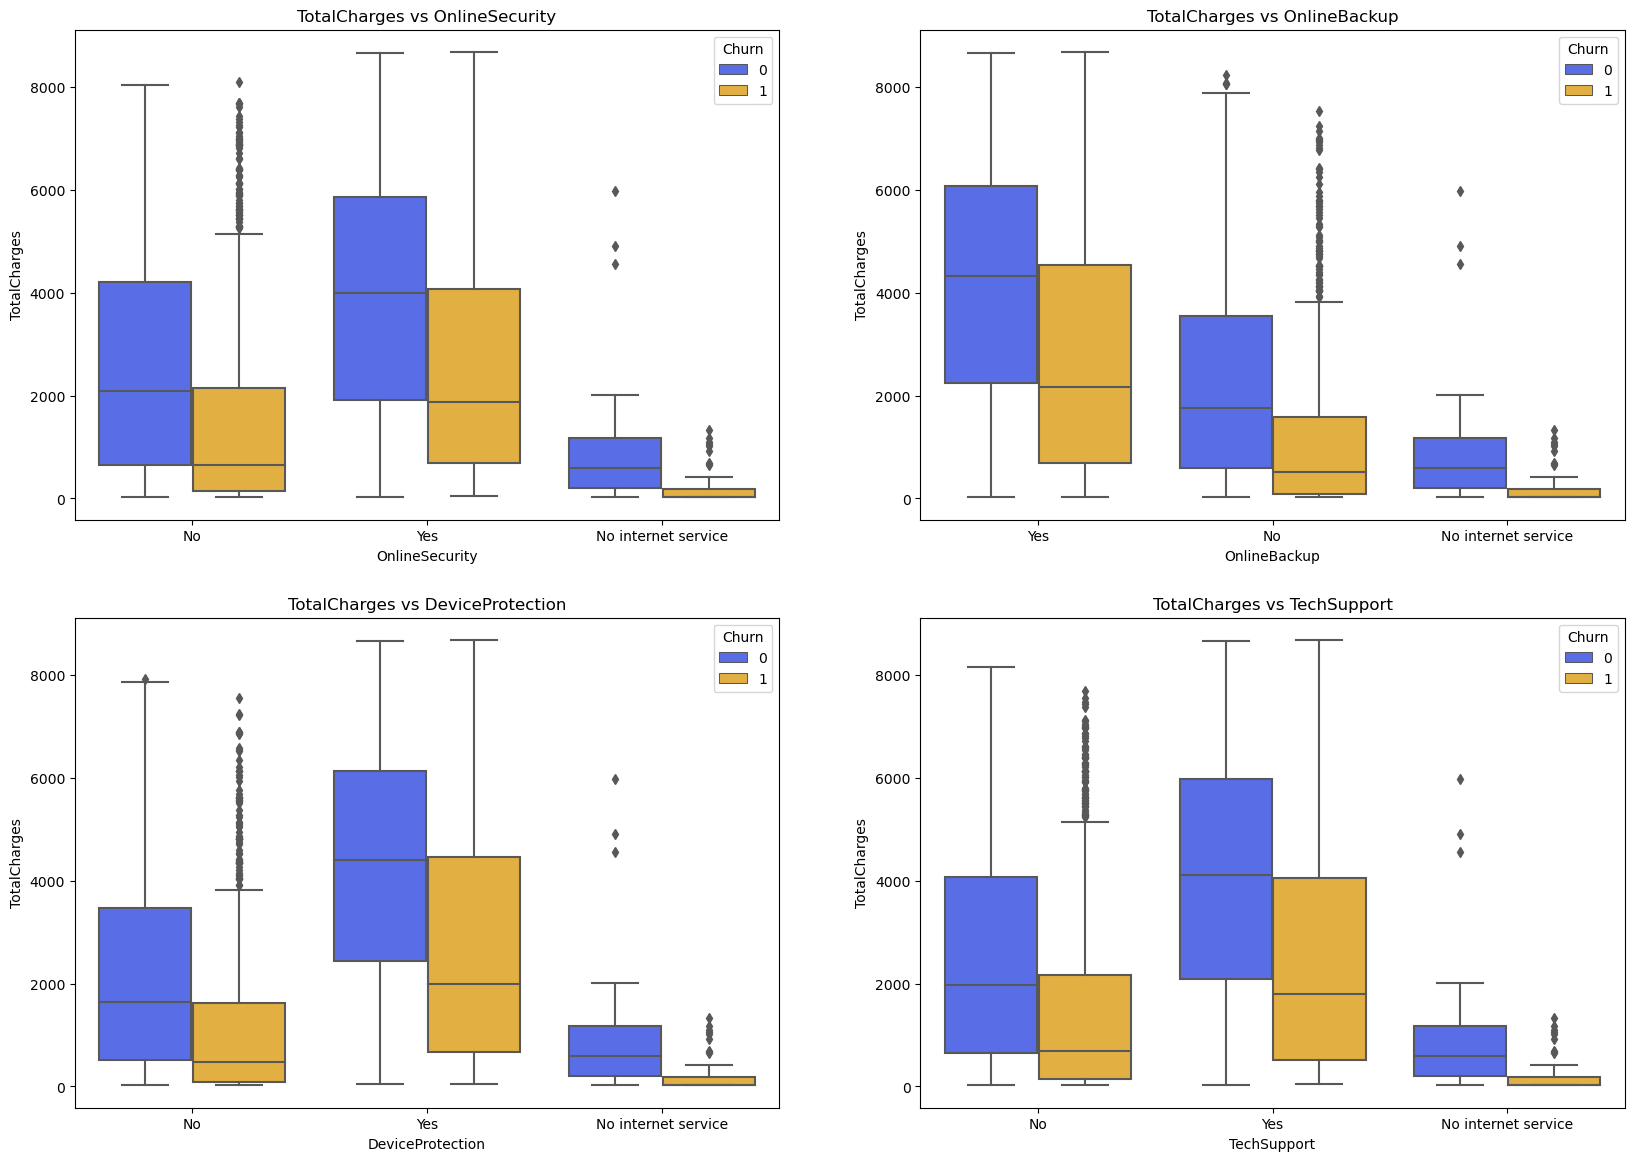

In [41]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'TotalCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l2[i-4]);

- For all the features mentioned above, customers become skeptical about paying for them around the 2000 mark. This median value of churn customers is very close to the lower limit of the customers that carry on with this service.
- Customers that do not churn out are ready to pay from 2000 - 6000 of TotalCharges.

#### TotalCharges vs Group 3 : Contract | PaperlessBilling | PaymentMethod |

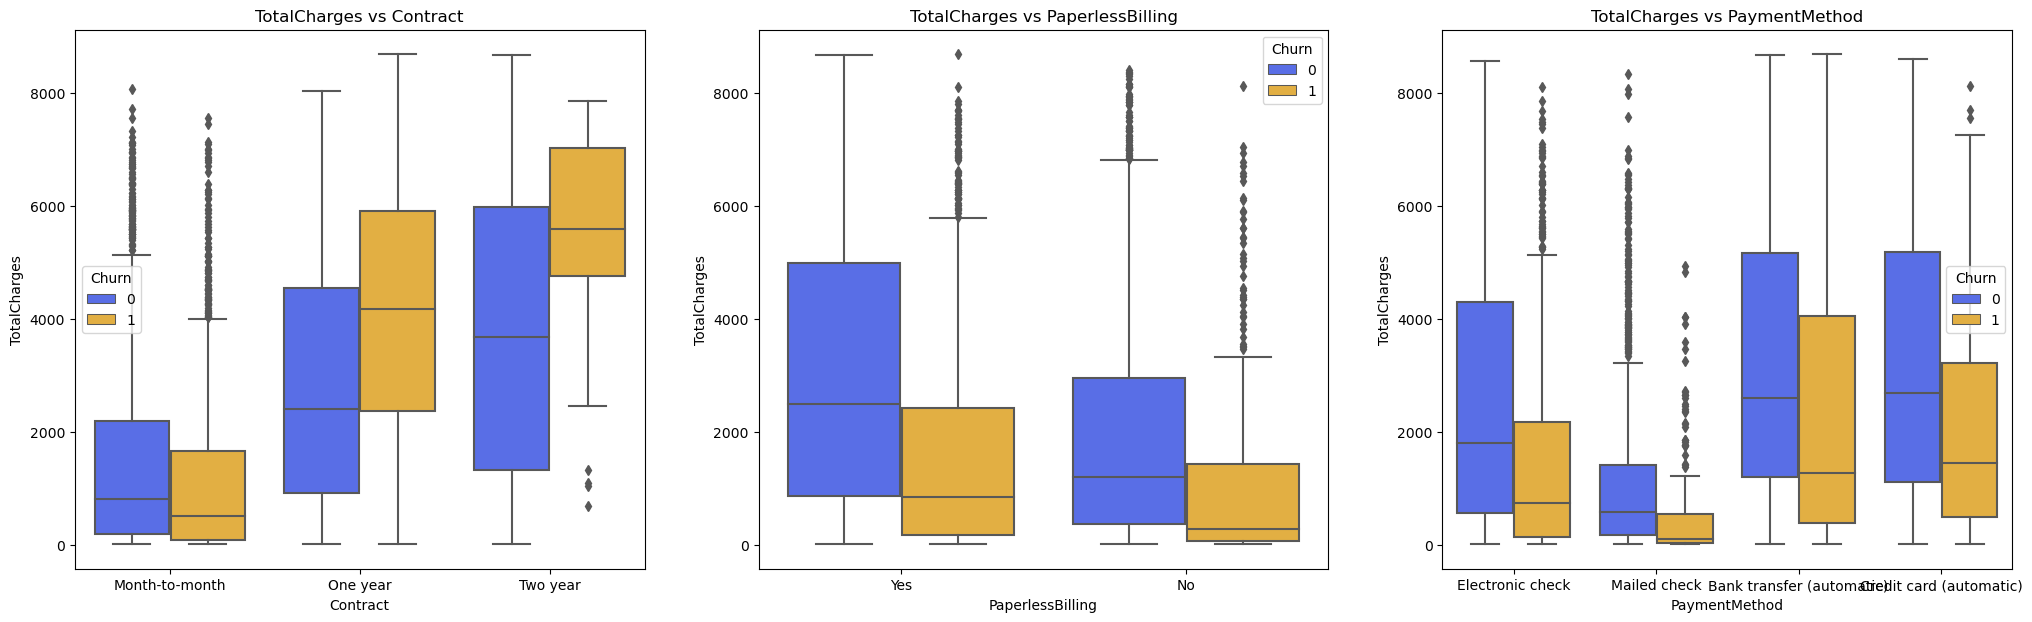

In [42]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'TotalCharges',data = data,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l3[i]);

- Median values of customers that decide to opt out from the services that have One year & Two year contracts is high at around 4000 & 6000. Some of the customers with Two year contracts even paid around 7000.
- For PaymentMethod, customers are skeptical to pay using Electronic check for a shorter range of 0 - 2000 whereas for Bank transfer (automatic) & Credit Card (automatic) this range is around 0 - 4000.

#### Numerical features vs Numerical features w.r.t Target variable (Churn) :

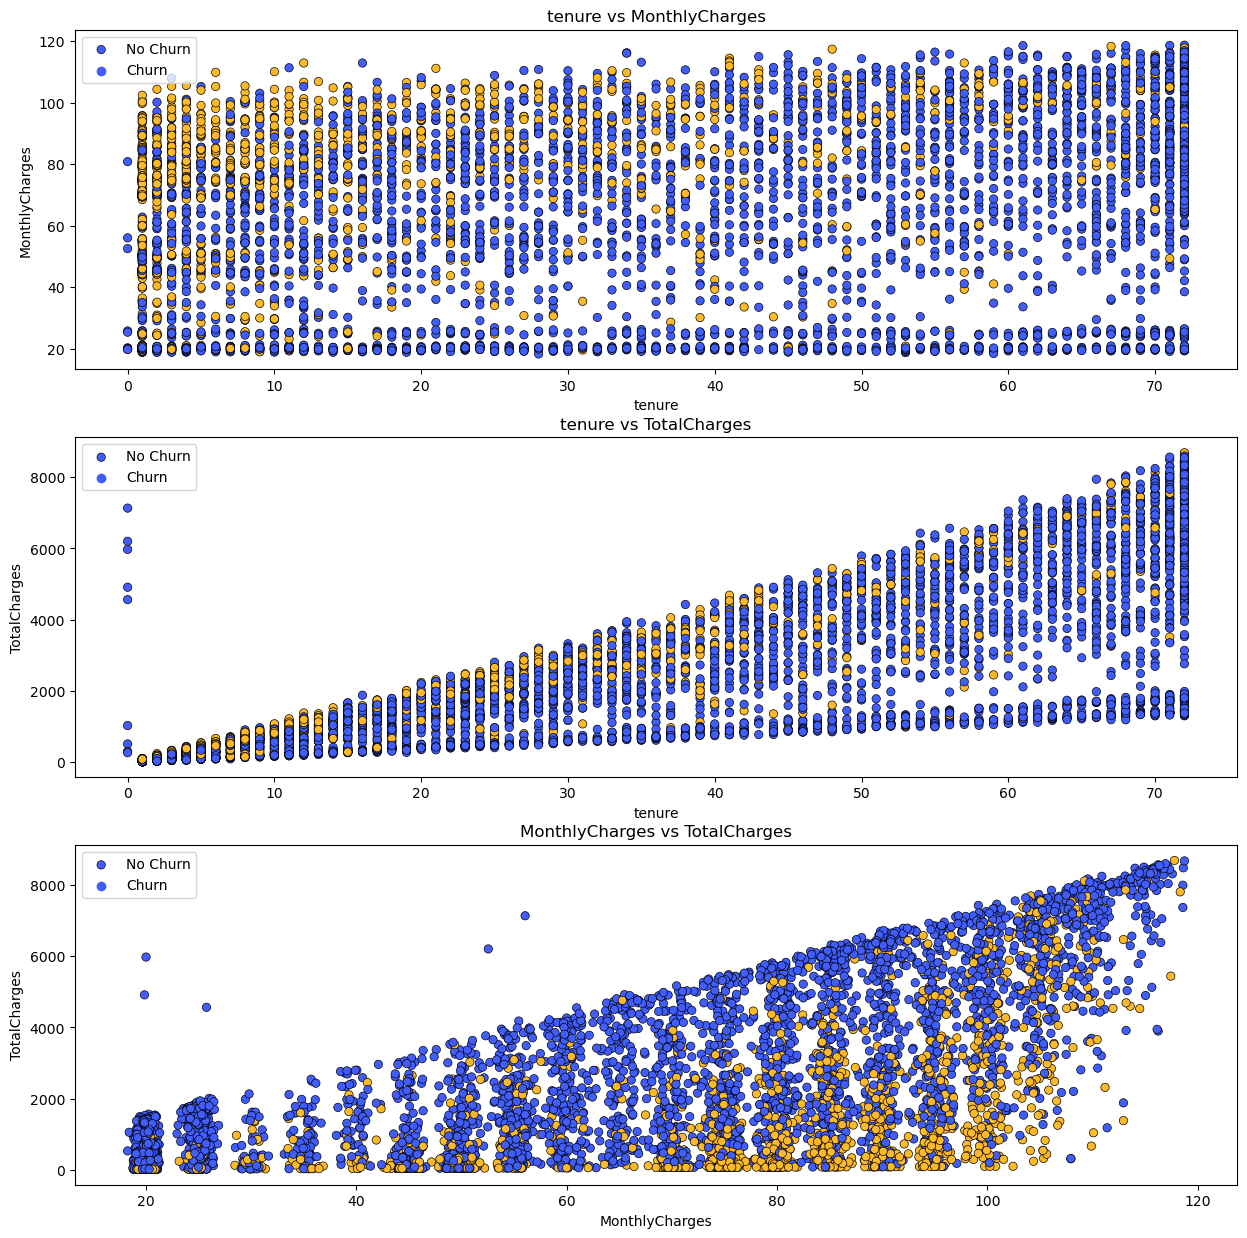

In [43]:
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = df1,hue = 'Churn',palette = colors,edgecolor = 'black');
            plt.legend(['No Churn','Churn'],loc = 'upper left',)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- For tenure of 0 - 20 months period, churning of customers quite at any MonthlyCharges values. For a tenure period from 20 - 60 months, customers at the top end of the MonthlyCharges values, 70 - 120, start to drop out from the services.
- For TotalCharges vs tenure, as tenure increases, TotalCharges increase as well! Customers opting out from their plans are the ones who are charged the highest of their tenure period alongwith a few customers whose Total Charges rank in the middle!
- Customers seemed to have decided to cancel their subscriptions when the MonthlyCharges reach 70 and above.

### Summary of EDA

- Order / Values of features for customer churn cases :
- Categorical Features (Order) :
- gender : Male = Female
- SeniorCitizen : No SeniorCitizen > SeniorCitizen
- Partner : No Partner > Partner
- Dependents : No Dependent > Dependent
- PhoneService : PhoneService > No PhoneService
- MultipleLines : MultipleLines > No MultipleLines > No PhoneService
- InternetService : Fiber Optic > DSL > No InternetService
- OnlineSecurity : Absent > Present > No InternetService
- OnlineBackup : Absent > Present > No InternetService
- DeviceProtection : Absent > Present > No InternetService
- TechSupport : Absent > Present > No InternetService
- StreamingTV : Absent > Present > No InternetService
- StreamingMovies : Absent > Present > No InternetService
- Contract : Month-to-Month > One year > Two year
- PaperlessBilling : Present > Absent
- PaymentMethod : Electronic check > Mailed check > Bank Transfer (automatic) > Credit Card (automatic)!


Numerical Features (Range) :
- tenure : 1 - 5 months
- MonthlyCharges : 65 - 105
- TotalCharges : 0 - 1000

According to the EDA, these order / range of values results in customer churn!

## Step 3: Feature Engineering

#### Data Scaling :

In [44]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1.drop(columns = ['MonthlyCharges_Group','TotalCharges_Group'], inplace = True)

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0    0.01             0   
1       1              0        0           0    0.47             1   
2       1              0        0           0    0.03             1   
3       1              0        0           0    0.62             0   
4       0              0        0           0    0.03             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2            0.12          0.00      0  
1                 0              3            0.39          0.22      0  
2                 1              3            0.35          0.01      1  
3                 0              0            0.24          0.21      0  
4                 1              2            0.52          0.02      1

- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

Eg : Age = Years; Charges = Currency and so on.,

- We have 2 options for data scaling : 

    1) Normalization  
    
    2) Standardization. 
    
- As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.
- Normalization : tenure, MonthlyCharges and TotalCharges features are normalized as they displayed a right skewed and bimodal data distribution.
- Standardization : None of the features are standardized for the above data.

#### Correlation Matrix :

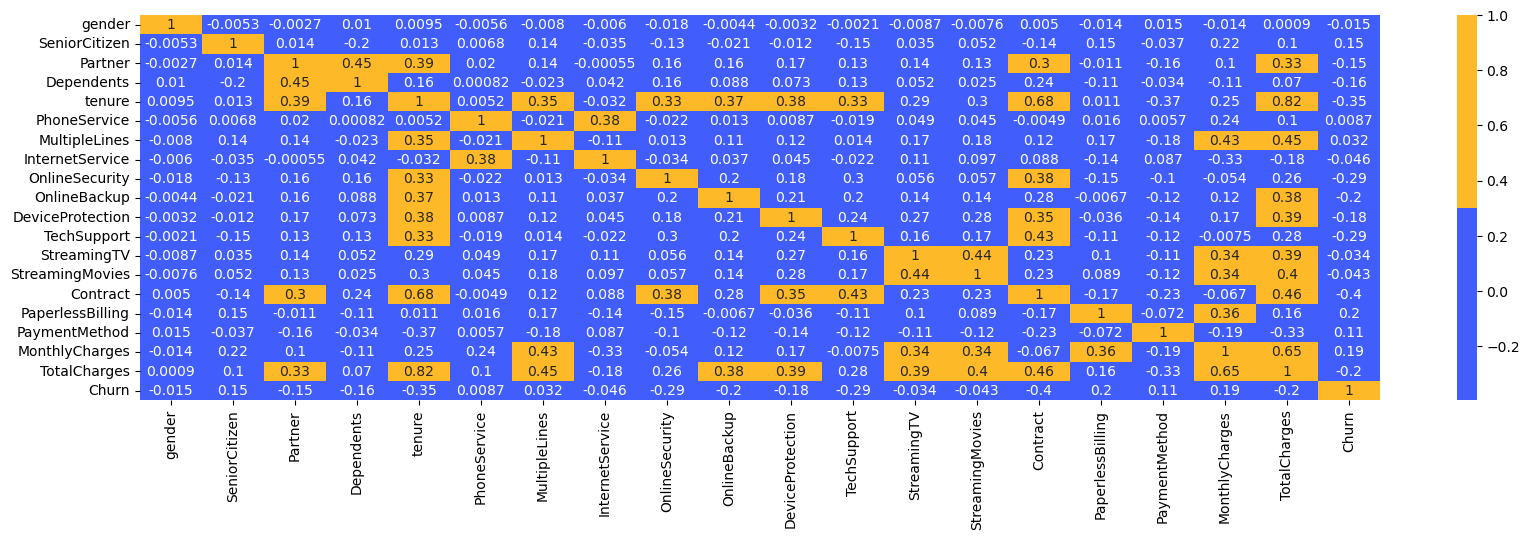

In [45]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

- It is a huge matrix with too many features. We will check the correlation only with respect to *Churn*.

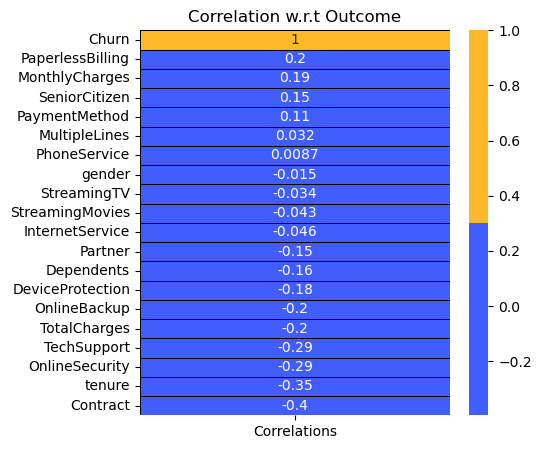

In [46]:
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

- *MulipleLines*, *PhoneService*, *gender*, *StreamingTV*, *StreamingMovies* and *InternetService* does not display any kind of correlation. We drop the features with correlation coefficient between (-0.1,0.1).
- Remaining features either display a significant positive or negative correlation

#### Feature Selection for Categorical Features :

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

#### Chi-Squared Test :

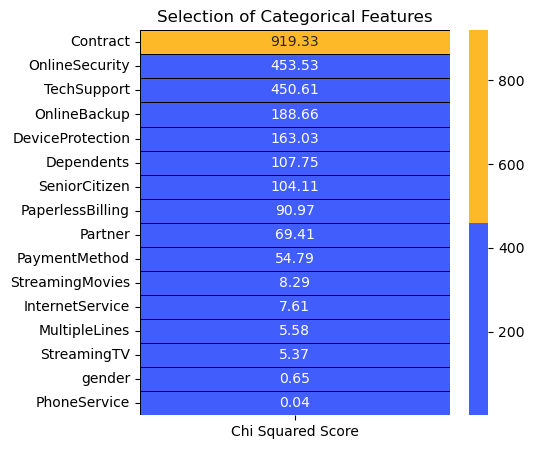

In [49]:
features = df1.loc[:,categorical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines and InternetService display a very low relation with Churn.

#### Feature Selection for Numerical Features :

In [50]:
from sklearn.feature_selection import f_classif

#### ANOVA Test :

Text(0.5, 1.0, 'Selection of Numerical Features')

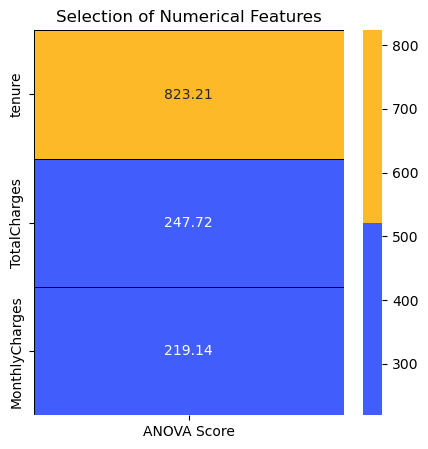

In [52]:
from sklearn.feature_selection import SelectKBest, f_classif

# Drop NaN values from the features and target DataFrames
features = df1.loc[:, numerical_features].dropna()
target = df1.loc[features.index, 'Churn']  # Update target to match indices of non-NaN features

# Apply SelectKBest
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

# Create a DataFrame to store feature scores
featureScores = pd.DataFrame(data=fit.scores_, index=features.columns, columns=['ANOVA Score'])

# Plot feature scores
plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'), annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')

- According to the ANOVA test, higher the value of the ANOVA score, higher the importance of the feature.
- From the above results, we need to include all the numerical features for modeling.

In [53]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

SeniorCitizen  Partner  Dependents  tenure  OnlineSecurity  OnlineBackup  \
0              0        1           0    0.01               0             2   
1              0        0           0    0.47               2             0   
2              0        0           0    0.03               2             2   
3              0        0           0    0.62               2             0   
4              0        0           0    0.03               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  PaymentMethod  \
0                 0            0         0                 1              2   
1                 2            0         1                 0              3   
2                 0            0         0                 1              3   
3                 2            2         1                 0              0   
4                 0            0         0                 1              2   

   MonthlyCharges  TotalCharges  Churn  
0            0.12          0.00      0  
1            0.39          0.22      0  
2            0.35          0.01      1  
3            0.24          0.21      0  
4            0.52          0.02      1

#### Step 3.1: Data Balancing using SMOTE 

- In order to cope with unbalanced data, there are 2 options :

    - Undersampling : Trim down the majority samples of the target variable.
    - Oversampling : Increase the minority samples of the target variable to the majority samples.

- After doing trial-error with undersampling & oversampling, we have decided to go with oversampling!
- For data balancing, we will use **imblearn**.

- pip statement : pip install **imbalanced-learn**

In [55]:
!pip install imbalanced-learn -q

In [56]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [59]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Handle NaN values in the features
imputer = SimpleImputer(strategy='mean')   
f1_imputed = imputer.fit_transform(f1)

# Apply SMOTE
over = SMOTE(sampling_strategy=1)
f1_resampled, t1_resampled = over.fit_resample(f1_imputed, t1)

# Counter to check class distribution after resampling
from collections import Counter
Counter(t1_resampled)


Counter({0: 4258, 1: 4258})

### Step 4 : Modeling

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [61]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

- Selecting the features from the above conducted tests and splitting the data into 80 - 20 train - test groups.

In [62]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

#### 1. XGBoost Classifier :

In [65]:
!pip install xgboost -q

In [66]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  84.86%
ROC_AUC Score :  70.43%


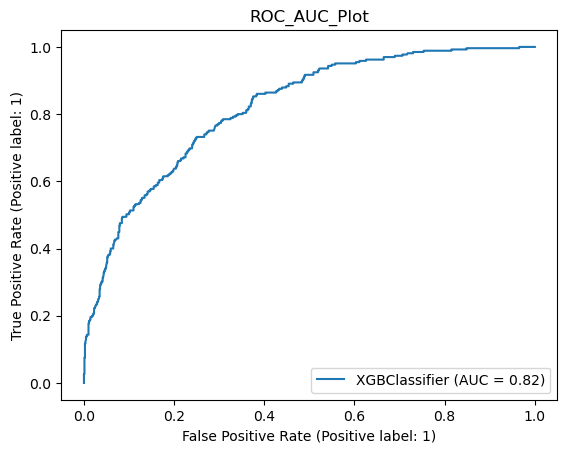

In [67]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       892
           1       0.60      0.51      0.55       265

    accuracy                           0.81      1157
   macro avg       0.73      0.70      0.72      1157
weighted avg       0.80      0.81      0.80      1157



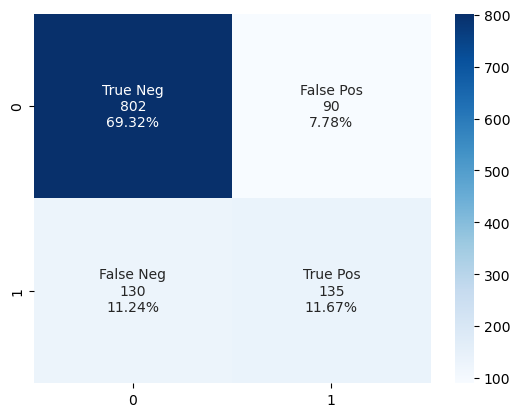

In [68]:
model_evaluation(classifier_xgb,x_test,y_test)

#### 2. LightGBM Classifier :

In [70]:
!pip install lightgbm -q

In [73]:
import warnings

# Filter out warnings
warnings.filterwarnings("ignore", category=Warning)

In [79]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000, verbose=-1)

Cross Validation Score :  84.82%
ROC_AUC Score :  70.62%


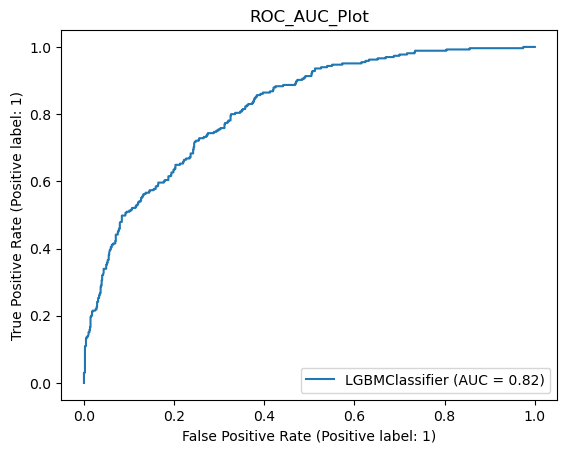

In [80]:
model(classifier_lgbm,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       892
           1       0.60      0.51      0.55       265

    accuracy                           0.81      1157
   macro avg       0.73      0.71      0.72      1157
weighted avg       0.80      0.81      0.81      1157



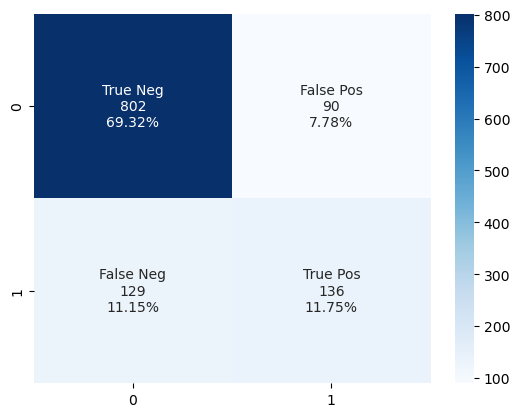

In [82]:
model_evaluation(classifier_lgbm,x_test,y_test)

#### 3. Random Forest Classifier :

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your input feature matrices

# Handle NaN values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(x_train)
X_test_imputed = imputer.transform(x_test)

# Convert data type if needed
X_train_float32 = X_train_imputed.astype('float32')
X_test_float32 = X_test_imputed.astype('float32')

# Initialize Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier_rf.fit(X_train_float32, y_train)

# Make predictions
y_pred = classifier_rf.predict(X_test_float32)


Cross Validation Score :  82.51%
ROC_AUC Score :  66.79%


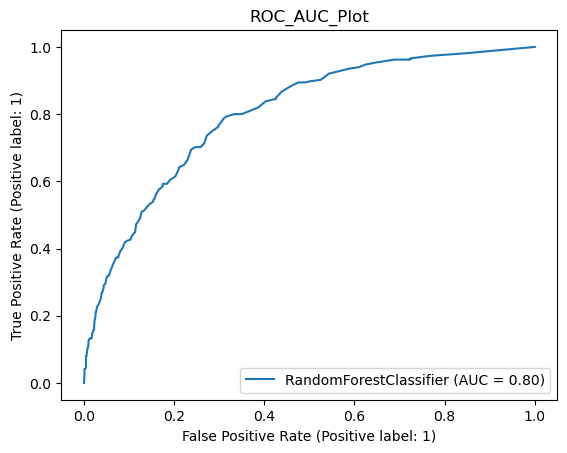

In [110]:
model(classifier_rf,X_train_float32,y_train,X_test_float32,y_test)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       892
           1       0.54      0.45      0.49       265

    accuracy                           0.79      1157
   macro avg       0.69      0.67      0.68      1157
weighted avg       0.77      0.79      0.78      1157



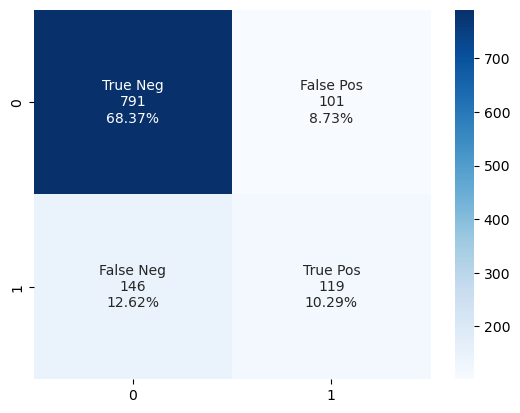

In [112]:
model_evaluation(classifier_rf,X_test_float32,y_test)

#### 4. Decision Tree Classifier :

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

In [117]:
# Handle NaN values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(x_train)
X_test_imputed = imputer.transform(x_test)

# Convert data type if needed
X_train_float32 = X_train_imputed.astype('float32')
X_test_float32 = X_test_imputed.astype('float32')

Cross Validation Score :  82.09%
ROC_AUC Score :  64.52%


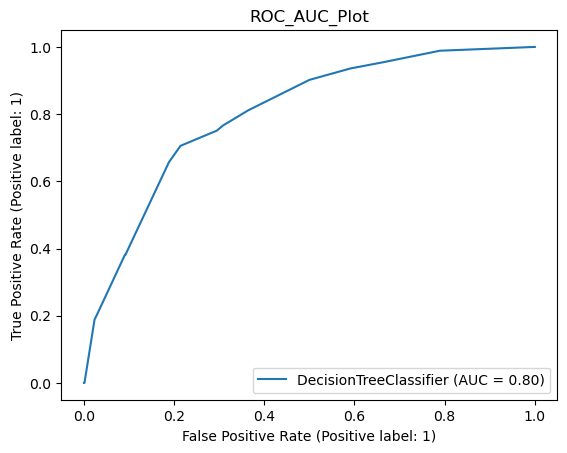

In [118]:
model(classifier_dt,X_train_float32,y_train,X_test_float32,y_test)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       892
           1       0.55      0.38      0.45       265

    accuracy                           0.79      1157
   macro avg       0.69      0.65      0.66      1157
weighted avg       0.77      0.79      0.77      1157



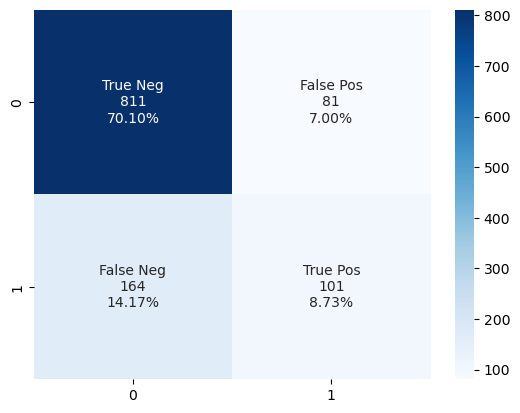

In [119]:
model_evaluation(classifier_dt,X_test_float32,y_test)

#### 5. Support Vector Classifier

In [120]:
from sklearn.svm import SVC

In [122]:
#With default Hyperparameters
classifier_svm = SVC()

In [125]:
# Handle NaN values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(x_train)
X_test_imputed = imputer.transform(x_test)

# Convert data type if needed
X_train_float32 = X_train_imputed.astype('float32')
X_test_float32 = X_test_imputed.astype('float32')

Cross Validation Score :  80.87%
ROC_AUC Score :  66.89%


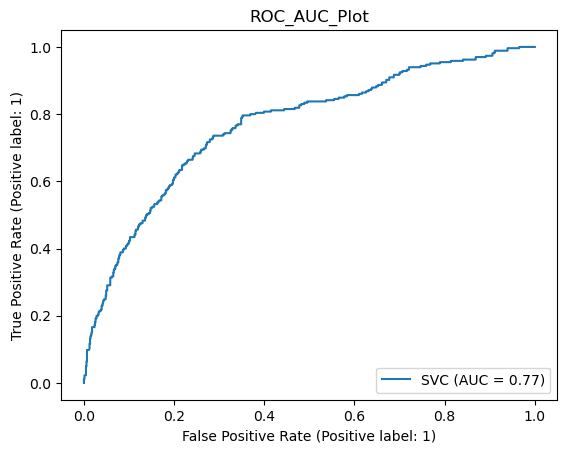

In [126]:
model(classifier_svm,X_train_float32,y_train,X_test_float32,y_test)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       892
           1       0.53      0.46      0.49       265

    accuracy                           0.78      1157
   macro avg       0.69      0.67      0.68      1157
weighted avg       0.77      0.78      0.78      1157



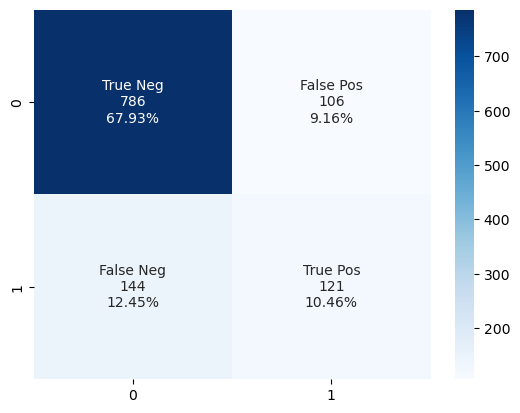

In [137]:
model_evaluation(classifier_svm,X_test_float32,y_test)

#### 6. Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
classifier_lr = LogisticRegression()

In [129]:
# Handle NaN values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(x_train)
X_test_imputed = imputer.transform(x_test)

# Convert data type if needed
X_train_float32 = X_train_imputed.astype('float32')
X_test_float32 = X_test_imputed.astype('float32')

Cross Validation Score :  84.46%
ROC_AUC Score :  70.23%


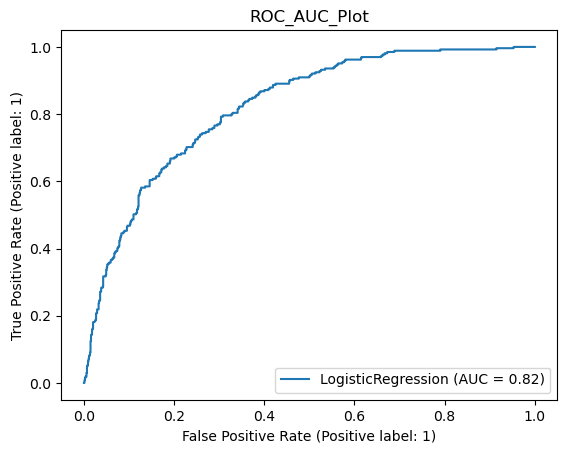

In [130]:
model(classifier_lr,X_train_float32,y_train,X_test_float32,y_test)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       892
           1       0.57      0.52      0.54       265

    accuracy                           0.80      1157
   macro avg       0.71      0.70      0.71      1157
weighted avg       0.79      0.80      0.80      1157



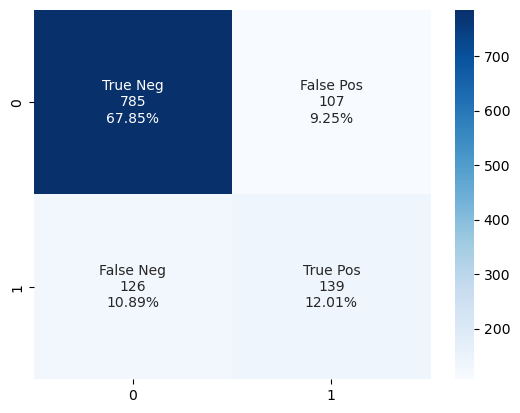

In [138]:
model_evaluation(classifier_lr,X_test_float32,y_test)

#### 7. Stack of XGBClassifier, LightGBMClassifier, Random Forest Classifer, Decision Tree Classifierm, Support Vector Classifier and Logistic Regression :


In [131]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
                                         ('classifier_lgbm',classifier_lgbm),
                                         ('classifier_rf',classifier_rf),
                                         ('classifier_dt',classifier_dt),
                                         ('classifier_svm',classifier_svm),
                                         ('classifier_lr',classifier_lr)],
                           final_estimator = classifier_lgbm)

For stacking of classifiers, we stack the above 4 classifiers :

- XGBClassifier
- LightGBMClassifier
- RandomForestClassifier
- DecisionTreeClassifier
- Support Vector Classifier
- Logistic Regression

It has an important hyperparameter known as final_estimator. It is the classifier that makes the final prediction by using the predicted classes by the various classifier and predicts the final output

In [134]:
# Handle NaN values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(x_train)
X_test_imputed = imputer.transform(x_test)

# Convert data type if needed
X_train_float32 = X_train_imputed.astype('float32')
X_test_float32 = X_test_imputed.astype('float32')

Cross Validation Score :  84.42%
ROC_AUC Score :  72.13%


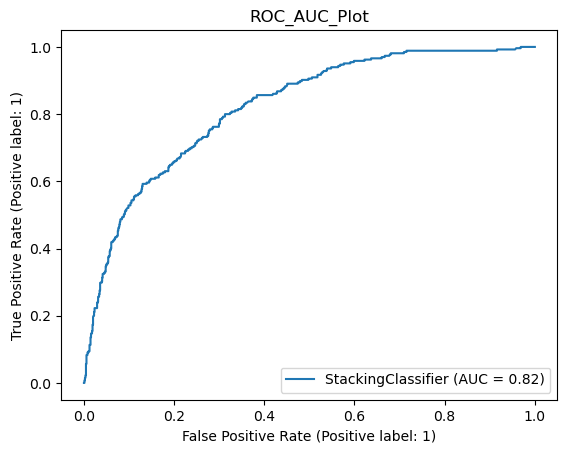

In [135]:
model(stack,X_train_float32,y_train,X_test_float32,y_test)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       892
           1       0.60      0.55      0.57       265

    accuracy                           0.81      1157
   macro avg       0.73      0.72      0.73      1157
weighted avg       0.81      0.81      0.81      1157



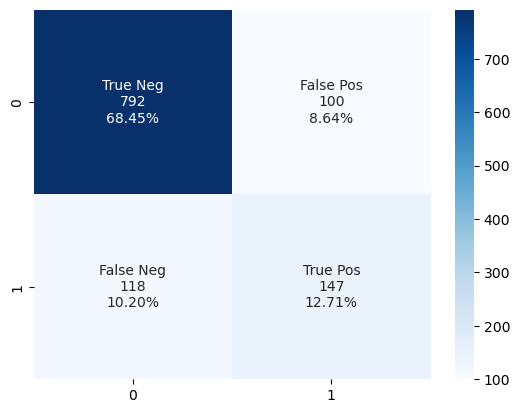

In [136]:
model_evaluation(stack,X_test_float32,y_test)

## Results

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Churn)|
|-|-|-|-|-|
|1|XGBClassifier|84.86%|70.43%|88%|
|2|LightGBMClassifier|84.82%|70.62%|88%|
|3|RandomForestClassifier|82.51%|66.79%|86%|
|4|DecisionTreeClassifier|82.09%|64.52%|87%|
|5|SupportVectorClassifier|80.87%|66.89%|86%|
|6|LogisticRegression|84.46%|70.23%|87%|
|7|Stack of All 6 Classifiers|84.42%|72.13%|88%|

### Conclusion 

3 types of customers should be targeted : **SeniorCitizen**, Living with a **Partner**, living all alone!

- The number of **SeniorCitizen** customers are low but their lowerlimit of **MonthlyCharges** is higher than the other customers. Thus, **SeniorCitizen** customers are ready to pay top dollar but they need to catered with that level of service. For customers with a **Partner** as well as customers living alone, they prefer services with **MonthlyCharges** below 65. 

- Inorder to create a strong foundation of customers, Telco Company needs to create an easy and affordable entry point for their services. For the **tenure** of 1st 6 months, it needs to focus extensively on **OnlineSecurity**, **OnlineBackup**, **DeviceProtection** & **TechSupport** as this period is the most critical and uncertain for the customers. They must lower the churn tenure of **40 - 50** months for these services!.  

- Once they build a solid pipeline of support services for customers, they need to push the usage of **MultipleLines** & **Fiber Optic** cables for the **PhoneService** & **InternetService** respectively. But the major hurdle for these 2 services is the starting point of **75+** in **MonthlyCharges**.


- Thus, they need to create combinations of options provided for **PhoneService** & **InternetService** where average of these **MonthlyCharges** will be in the range of **100 - 120** :
    - **No MultipleLines** + **OpticFiber**
    - **MultipleLines** + **DSL**
- This will increase the mean income from a user as it completely drops the option of choosing a combination of **No MultipleLines + DSL** whose mean **MonthlyCharges** is probably **60 - 70**!


- **StreamingTV** and **StreamingMovies** need to be made affordable as well as reducing it's churn **tenure**. The content of these services should be targeting all types of customers. This needs to followed up with an easy and hassle free **PaymentMethod**.


- It needs to put an end to the **Electronic check** for payment purposes due to it's high churn and focus entirely on **Bank Transfer (automatic)** & **Credit Card (automatic)**! However, they will be challenged to reduce the median churn tenure of **above 20 months** for these 2 **PaymentMethod** which is double the churn tenure of **Electronic check**.


- Lower limit of **Electronic check** is around **60** whereas that of **Bank Transfer (automatic)** & **Credit Card (automatic)** is around **20** in **MonthlyCharges**. **PaperlessBilling** is another expensive feature with a starting point of 60 whereas the other options are cheap starting at **20** in **MonthlyCharges**.


- Once the **MonthlyCharges** for any single service hits the **70** mark, customers become very conscious about their **MonthlyCharges**. Quality of service needs to be the USP of the Telco Company! These measures will push the revenue as well as improve the current value delivery process! 